In [ ]:
!git clone https://github.com/ihdavjar/prml_minor_project.git

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
!pip install -U kaleido
import kaleido

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


Cloning into 'prml_minor_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
Unpacking objects: 100% (3/3), 5.10 KiB | 5.10 MiB/s, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


**Importing Data**

In [ ]:
original_data=pd.read_csv("/content/prml_minor_project/Country-data.csv")
original_data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
original_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [ ]:
x_data=original_data.drop(["country"],axis=1)

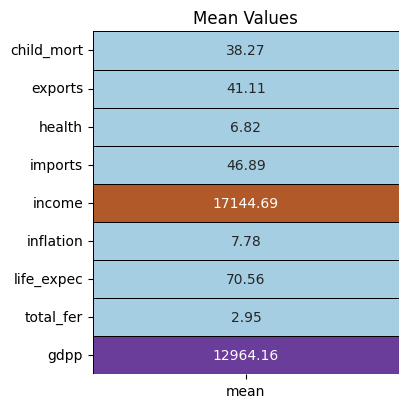

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(original_data.describe().T[['mean']],cmap="Paired",annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

**Checking Highest, Median, Lowest bases on each of the feature**

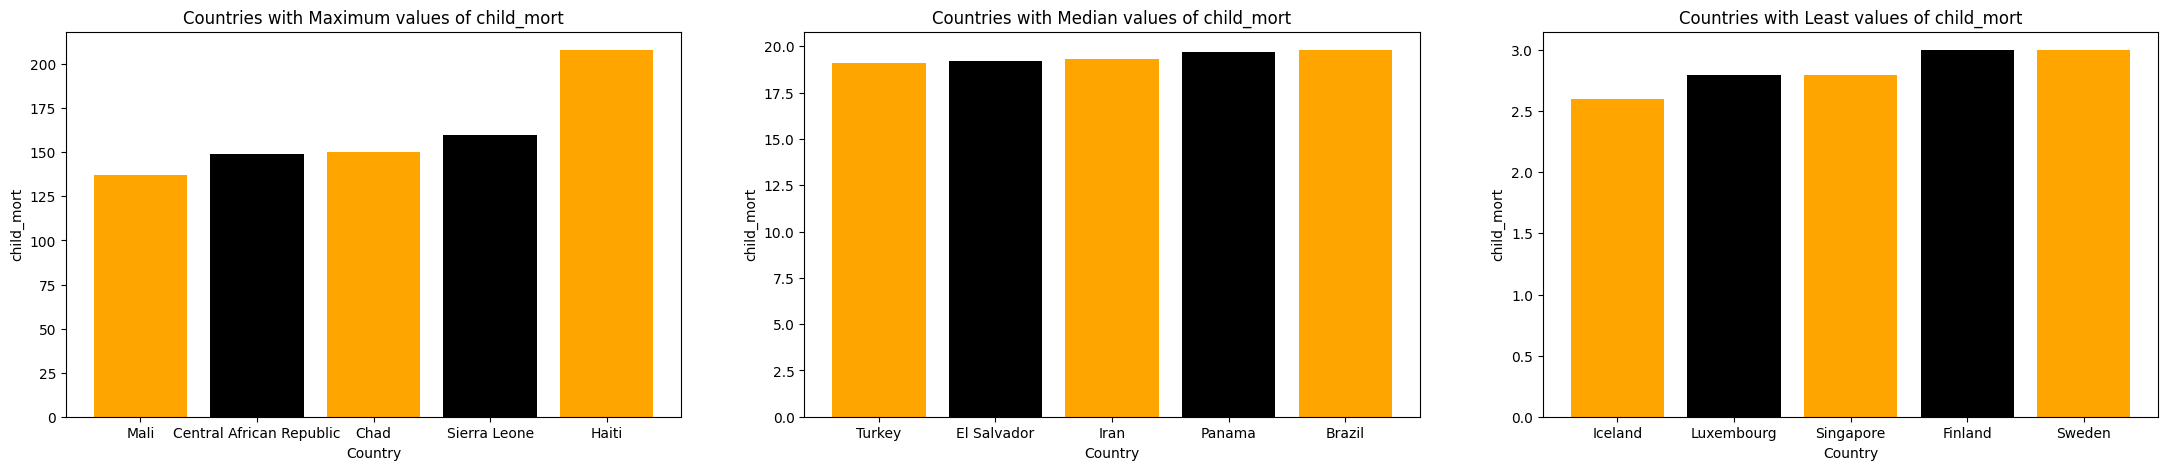

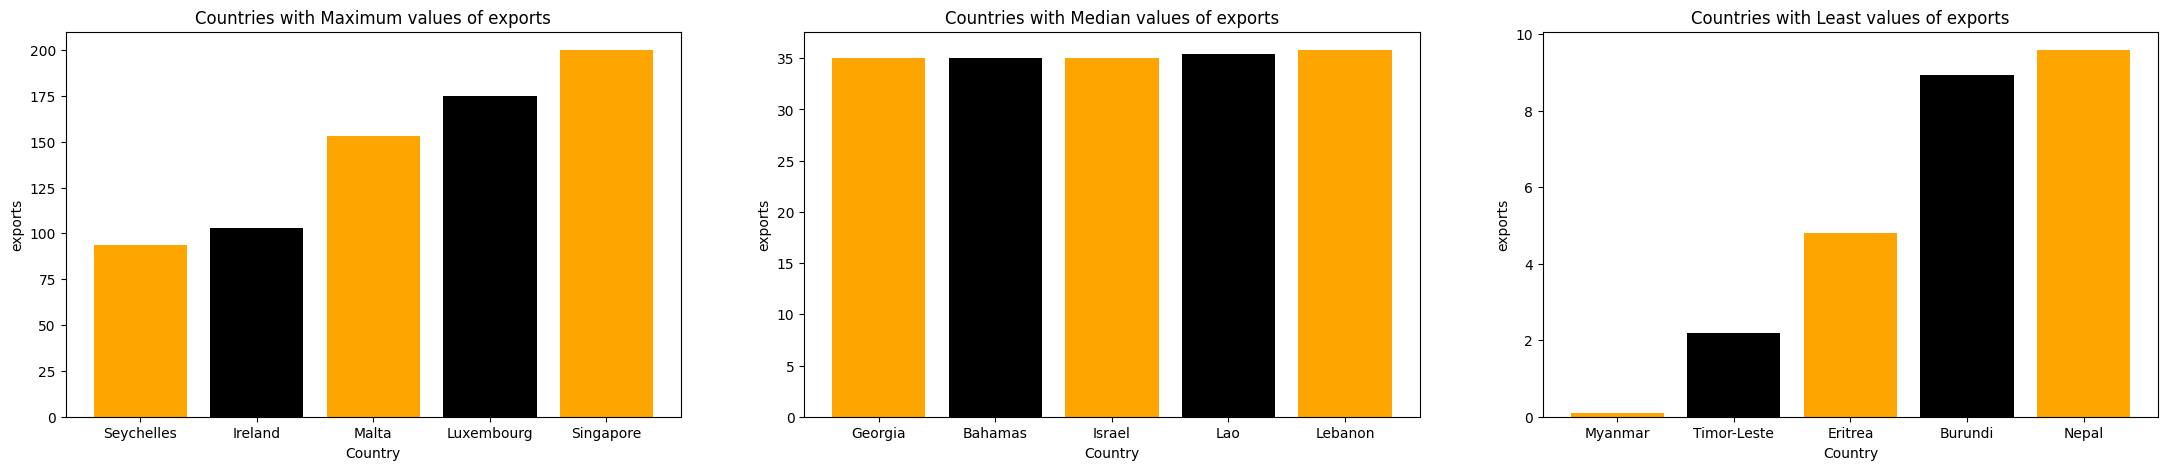

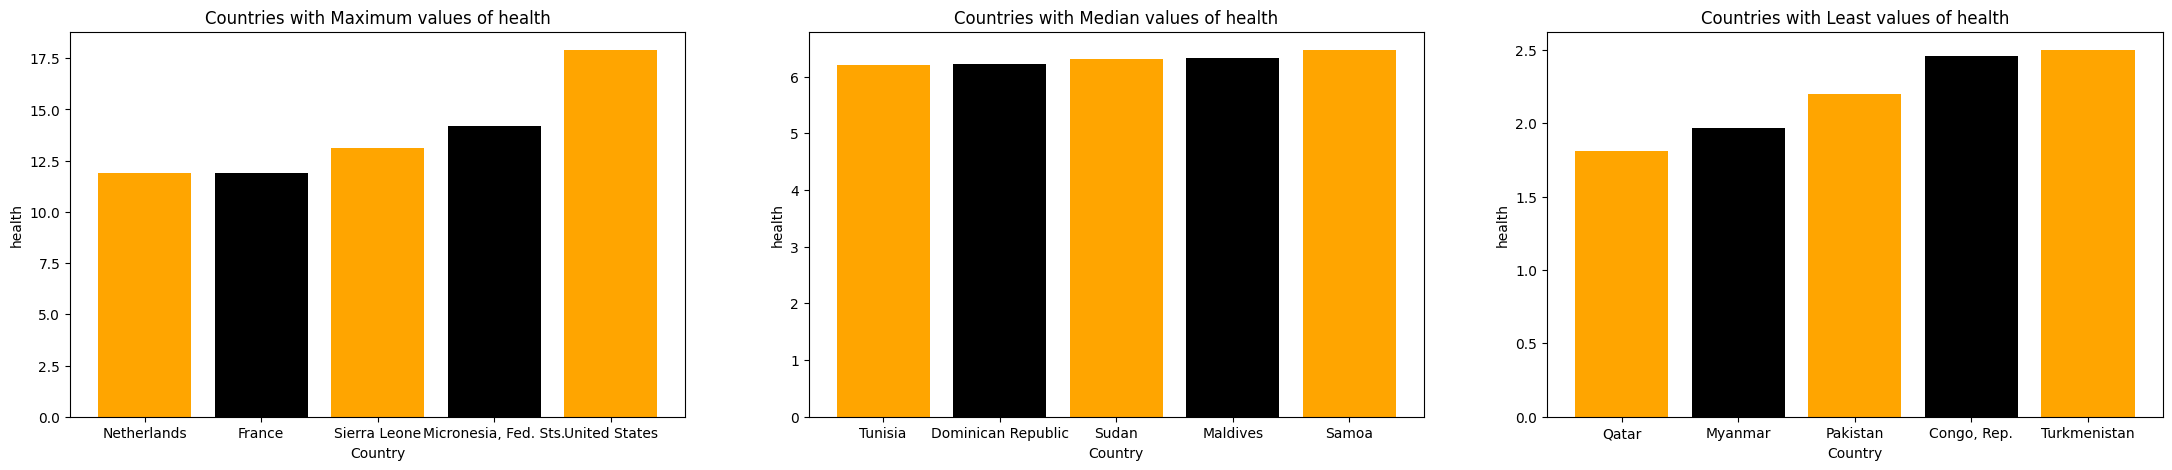

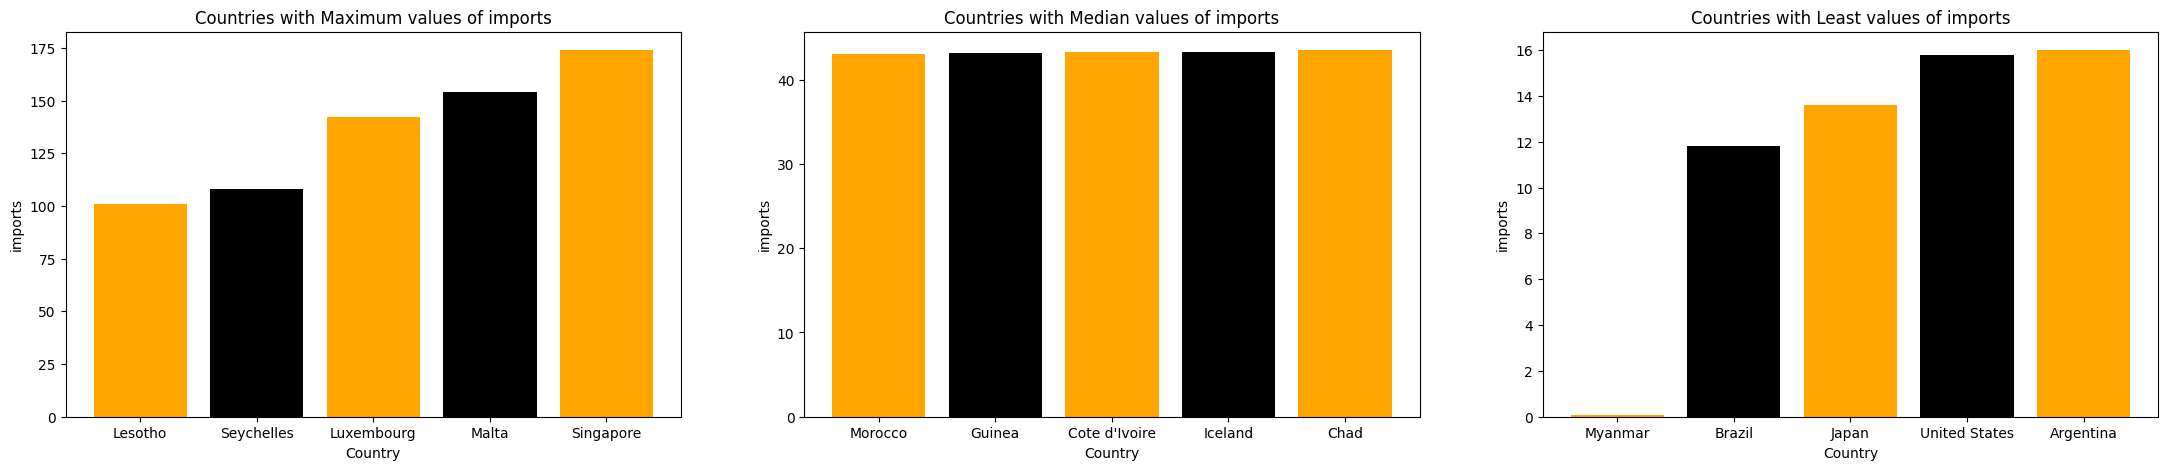

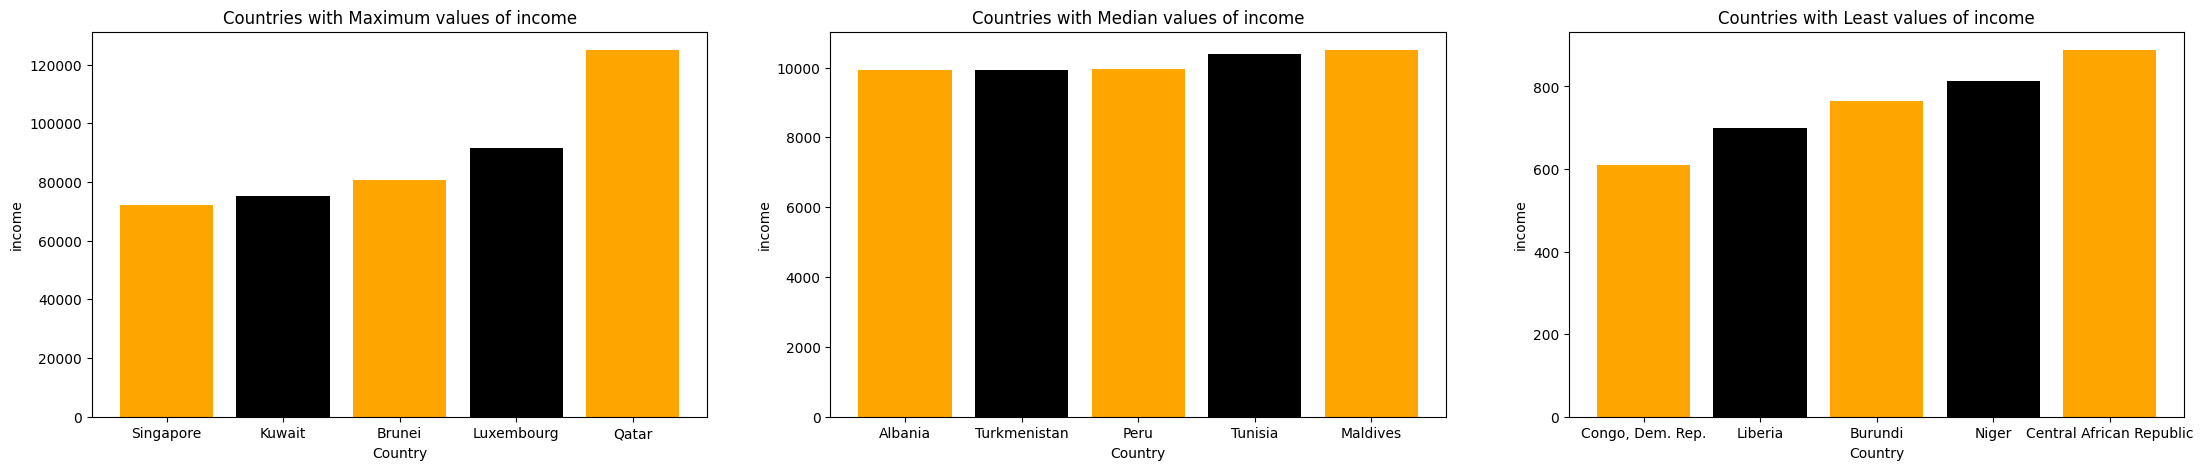

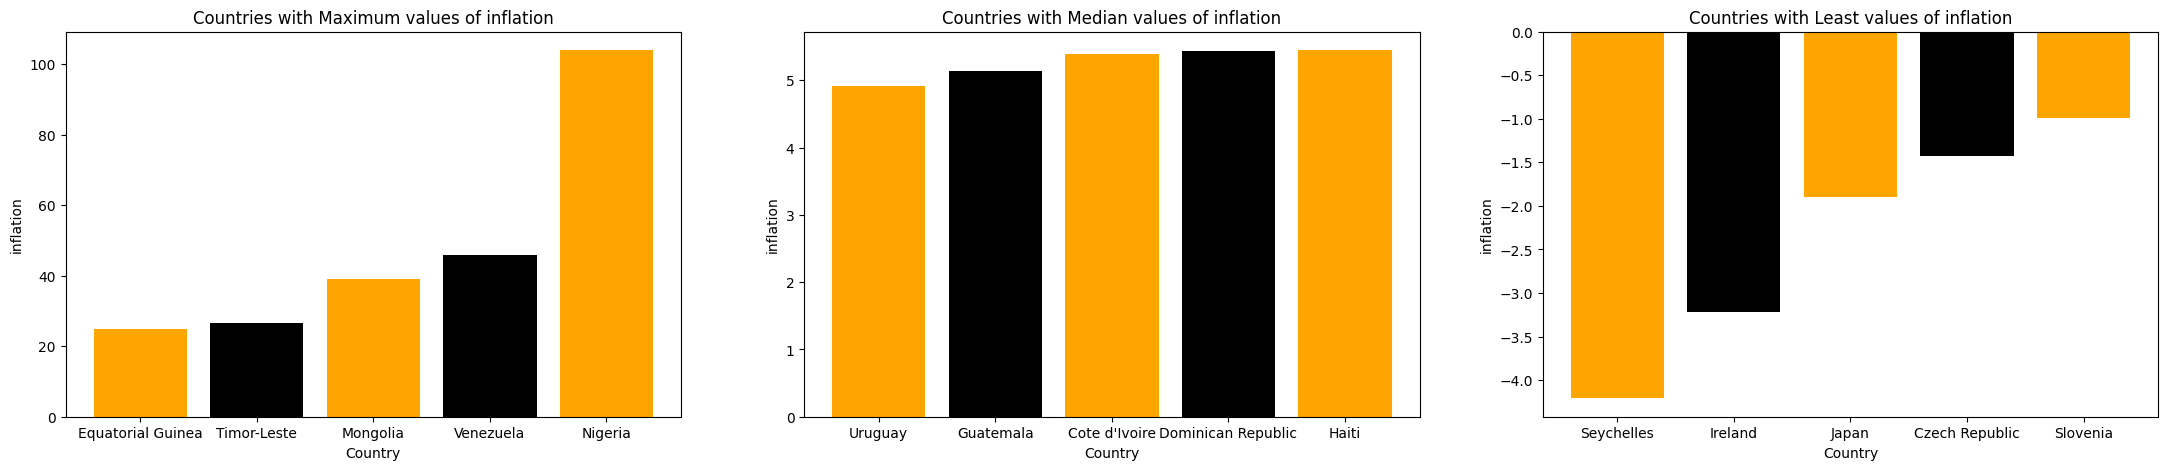

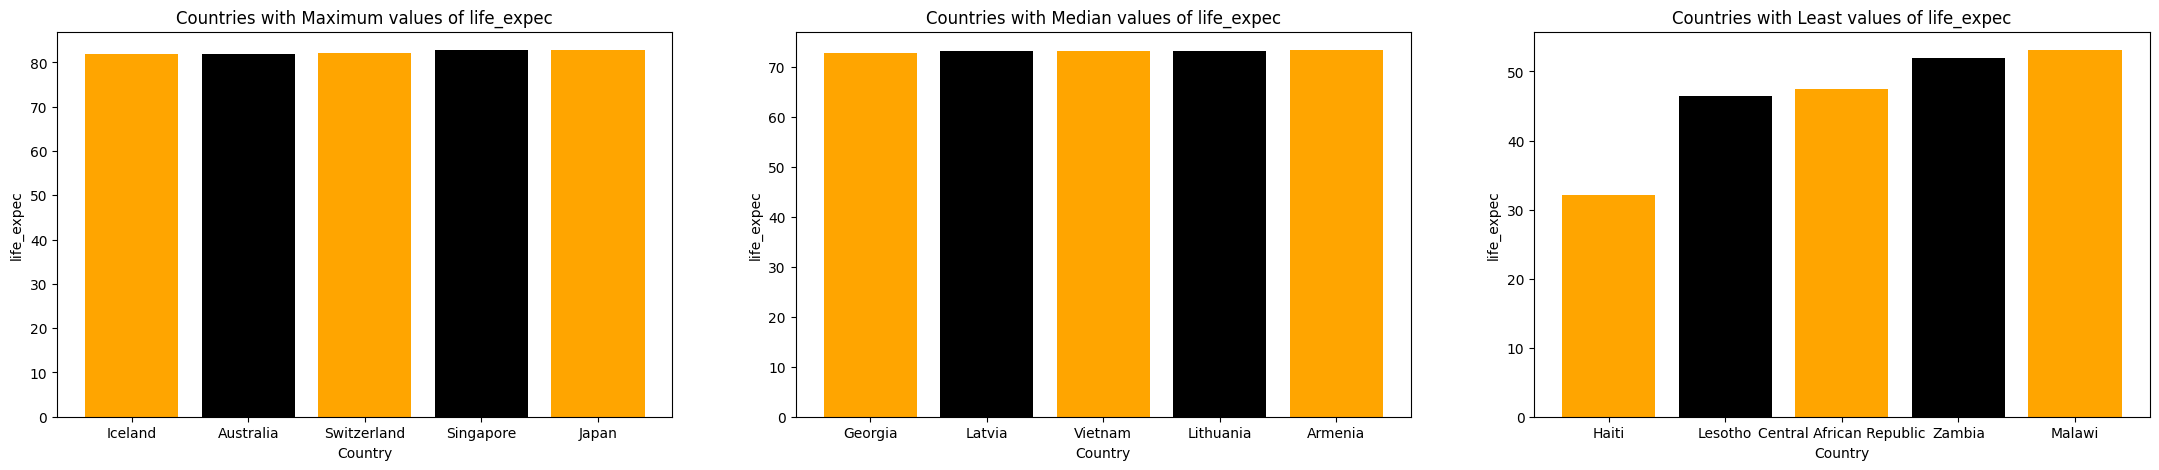

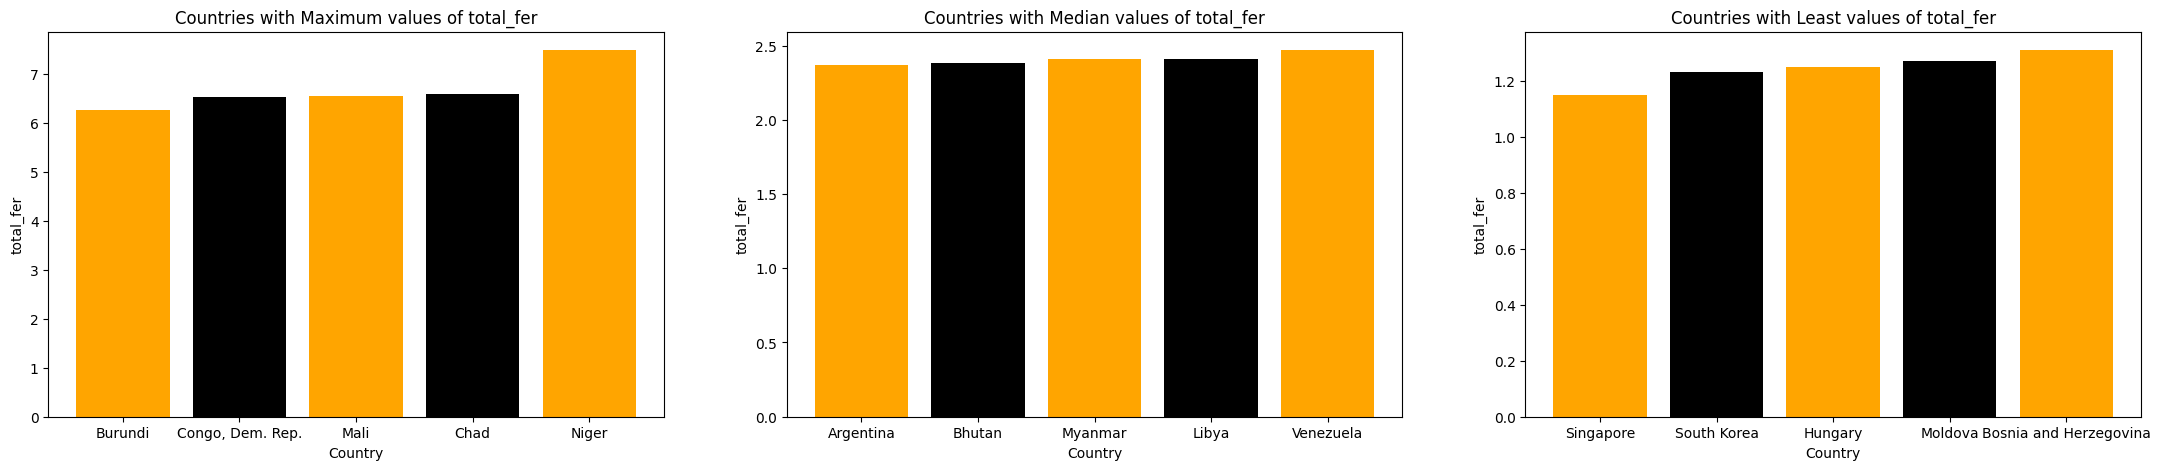

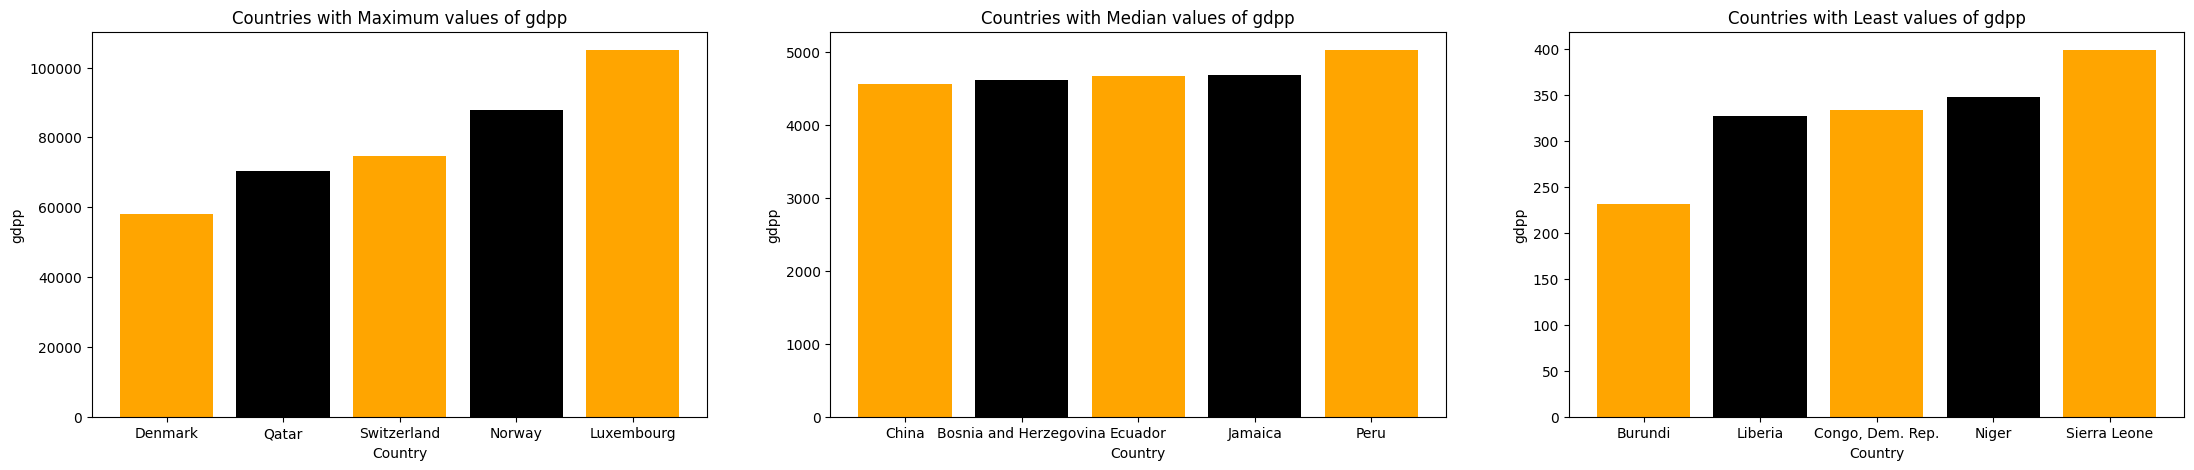

In [ ]:
temp_cols=list(x_data.columns)
country_names=np.array(original_data["country"])
for i in range(len(temp_cols)):
  fig = plt.subplots(nrows = 1,ncols = 3,figsize = (27,5))

  temp_arr=np.array(x_data[temp_cols[i]])
  idxs=np.argsort(temp_arr)
  mid_pt=int(len(idxs)/2)

  #Here i am finding the countries for each variable which have highest, median and least values
  least_vals=temp_arr[idxs[0:5]]
  mid_vals=temp_arr[idxs[[mid_pt-2,mid_pt-1,mid_pt,mid_pt+1,mid_pt+2]]]
  max_vals=temp_arr[idxs[len(idxs)-5:len(idxs)]]

  least_names=country_names[idxs[0:5]]
  mid_names=country_names[idxs[[mid_pt-2,mid_pt-1,mid_pt,mid_pt+1,mid_pt+2]]]
  max_names=country_names[idxs[len(idxs)-5:len(idxs)]]

  plt.subplot(1,3,1)
  plt.bar(max_names,max_vals,color=["orange","black"])
  plt.title("Countries with Maximum values of "+str(temp_cols[i]))
  plt.xlabel("Country")
  plt.ylabel(str(temp_cols[i]))

  plt.subplot(1,3,2)
  plt.bar(mid_names,mid_vals,color=["orange","black"])
  plt.title("Countries with Median values of "+str(temp_cols[i]))
  plt.xlabel("Country")
  plt.ylabel(str(temp_cols[i]))

  plt.subplot(1,3,3)
  plt.bar(least_names,least_vals,color=["orange","black"])
  plt.title("Countries with Least values of "+str(temp_cols[i]))
  plt.xlabel("Country")
  plt.ylabel(str(temp_cols[i]))

**Removing Na/Nan, If present**

In [ ]:
original_data.dropna(inplace=True)

**Visualising the Data**


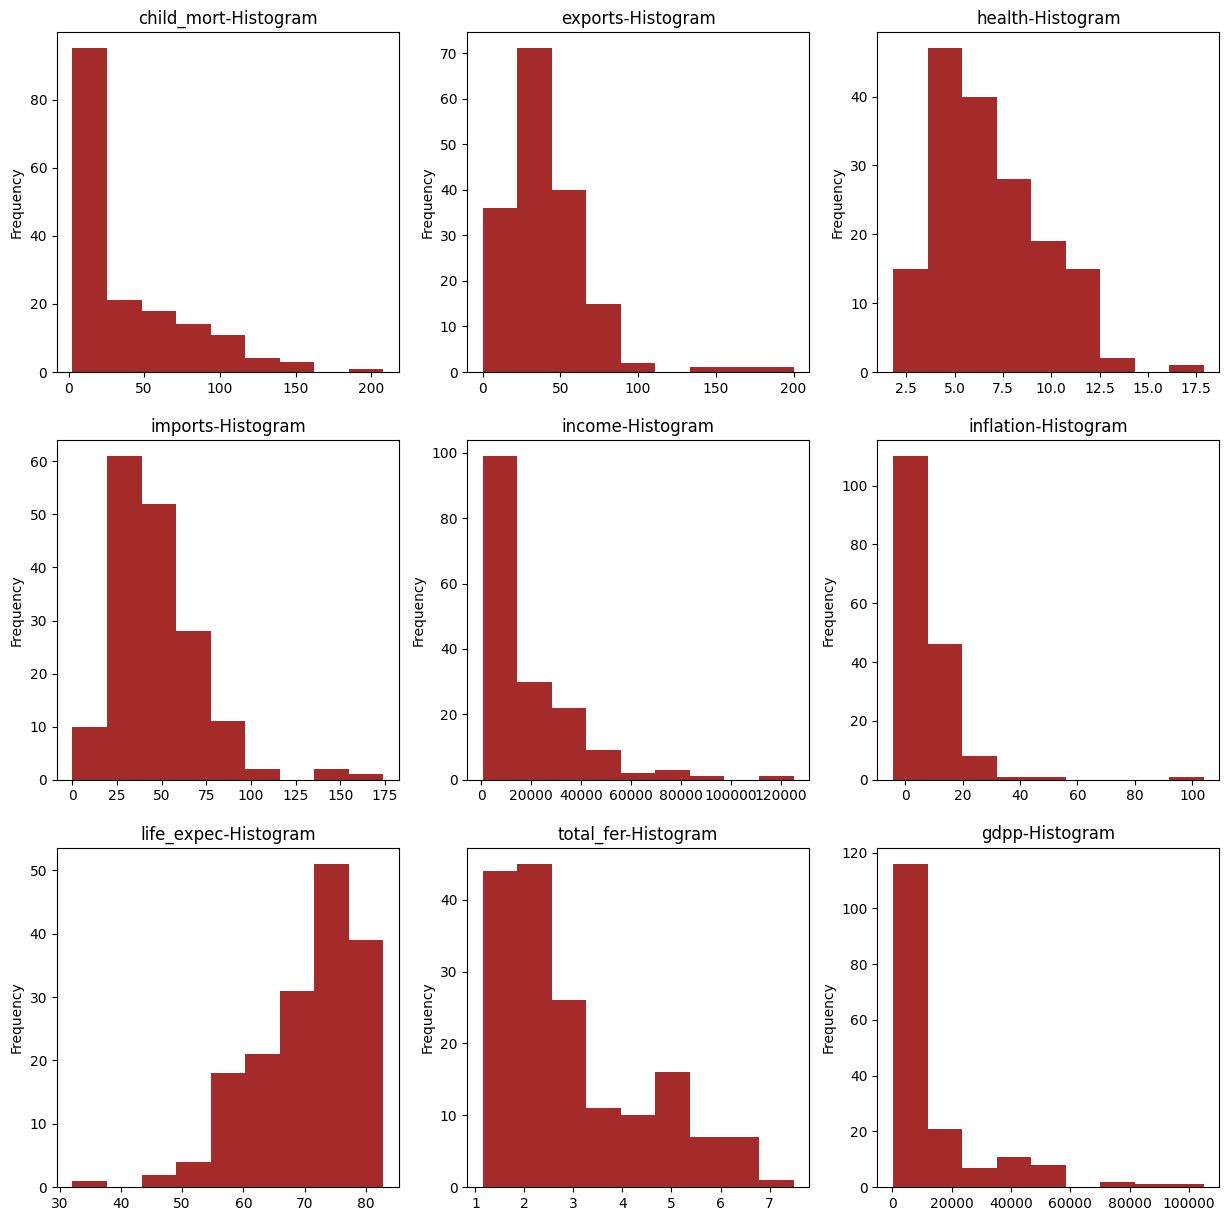

In [ ]:
def cat_of_list(l):
  l1=[]
  for i in l:
    if i not in l1:
      l1.append(i)
  return l1

def categories_output(d):
  l_col=list(d.columns)
  l1=[]
  d1={}
  for i in l_col:
    l=list(d[i])
    if (type(l[0])==str):
      l1.append(i)
      d1[i]=cat_of_list(l)
  return d1;

def visualisation_bar_hist(data):
  l_col=list(data.columns)
  temp_cat=categories_output(data)
  temp_keys=list(temp_cat.keys())
  temp_values=list(temp_cat.values())

  fig, ax = plt.subplots(nrows = 3,ncols = 4,figsize = (15,15))
  for i in range(len(l_col)):
    if l_col[i] in temp_keys:
      label=l_col[i]
      temp_val=temp_cat[label]
      temp_list=[]
      temp_columns=list(data[label])
      for j in range(len(temp_val)):
        temp_list.append(temp_columns.count(temp_val[j]))

      plt.subplot(3,3,i+1)
      plt.bar(temp_val,temp_list,color='brown')
      plt.title(l_col[i]+"-Bar Graph")
      plt.ylabel("Frequency")

    else:
      temp_columns=list(data[l_col[i]])
      plt.subplot(3,3,i+1)
      plt.hist(temp_columns,np.linspace(min(temp_columns),max(temp_columns),10,endpoint=True),color="brown")
      plt.title(l_col[i]+"-Histogram")
      plt.ylabel("Frequency")
  plt.show()

visualisation_bar_hist(x_data)

**Trying to find a outlier based on the Covariance Value**

<Axes: >

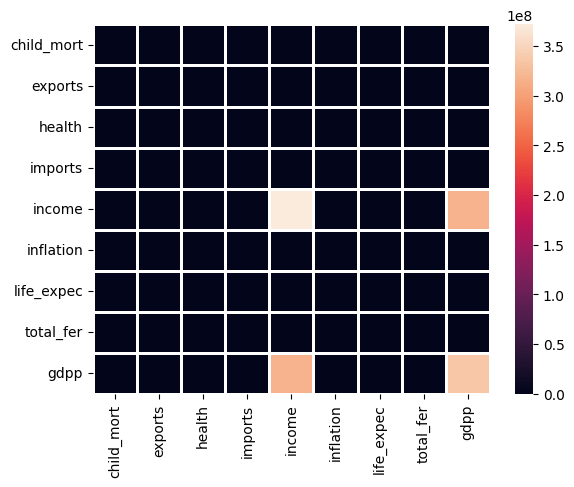

In [ ]:
sns.heatmap(x_data.cov(),cmap="rocket",linecolor="white",linewidth=0.8)

In [ ]:
def find_outliers(cov_data):
  l_cols=list(cov_data.columns)
  max_cov=-1
  in1=0
  in2=0
  for i in range(len(l_cols)):
    temp_l=list(cov_data[l_cols[i]])
    for j in range(len(l_cols)):
      if (max_cov<abs(temp_l[j]) and i!=j):
        in1=i
        in2=j

  return [l_cols[in1],l_cols[in2]]

temp_outliers=find_outliers(x_data.cov())


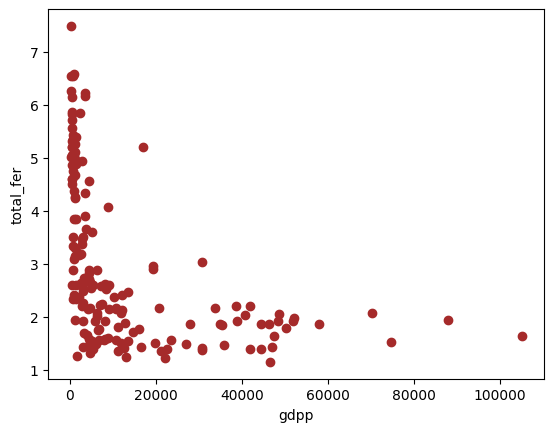

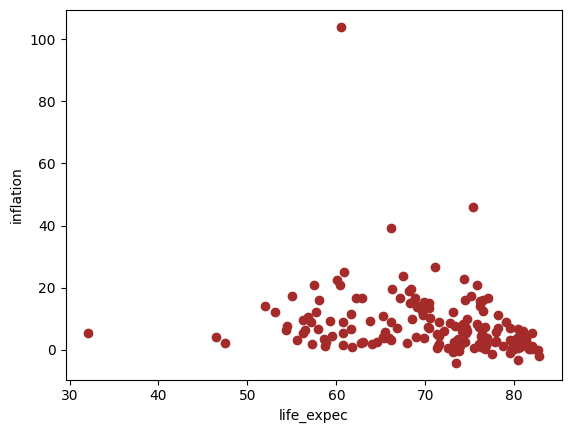

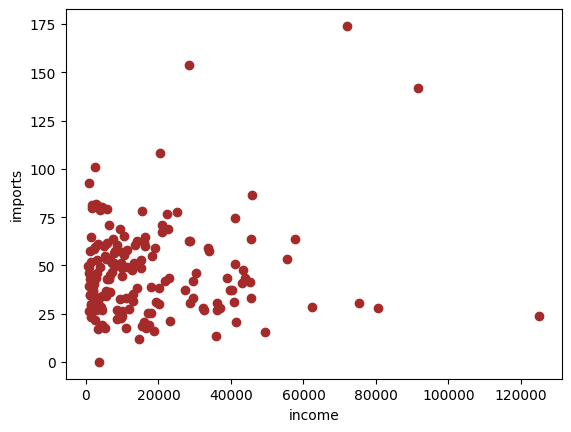

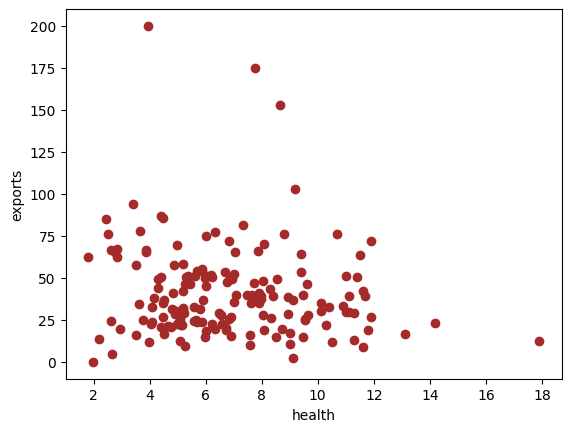

In [ ]:
temp_data=x_data.copy(deep=True)

for i in range(4):
  temp_outliers=find_outliers(temp_data.cov())
  plt.scatter(x_data[temp_outliers[0]],x_data[temp_outliers[1]],color="brown")
  plt.xlabel(temp_outliers[0])
  plt.ylabel(temp_outliers[1])
  temp_data=temp_data.drop([temp_outliers[0],temp_outliers[1]],axis=1)
  print("\n")
  plt.show()

**Its mostly the outliers that need to be given Aid**

**Data Standardisation**

In [ ]:
stan=StandardScaler()
scaled_data=stan.fit_transform(x_data)
scaled_data=pd.DataFrame(scaled_data,columns=temp_cols)
scaled_data.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

**After Normalisation**

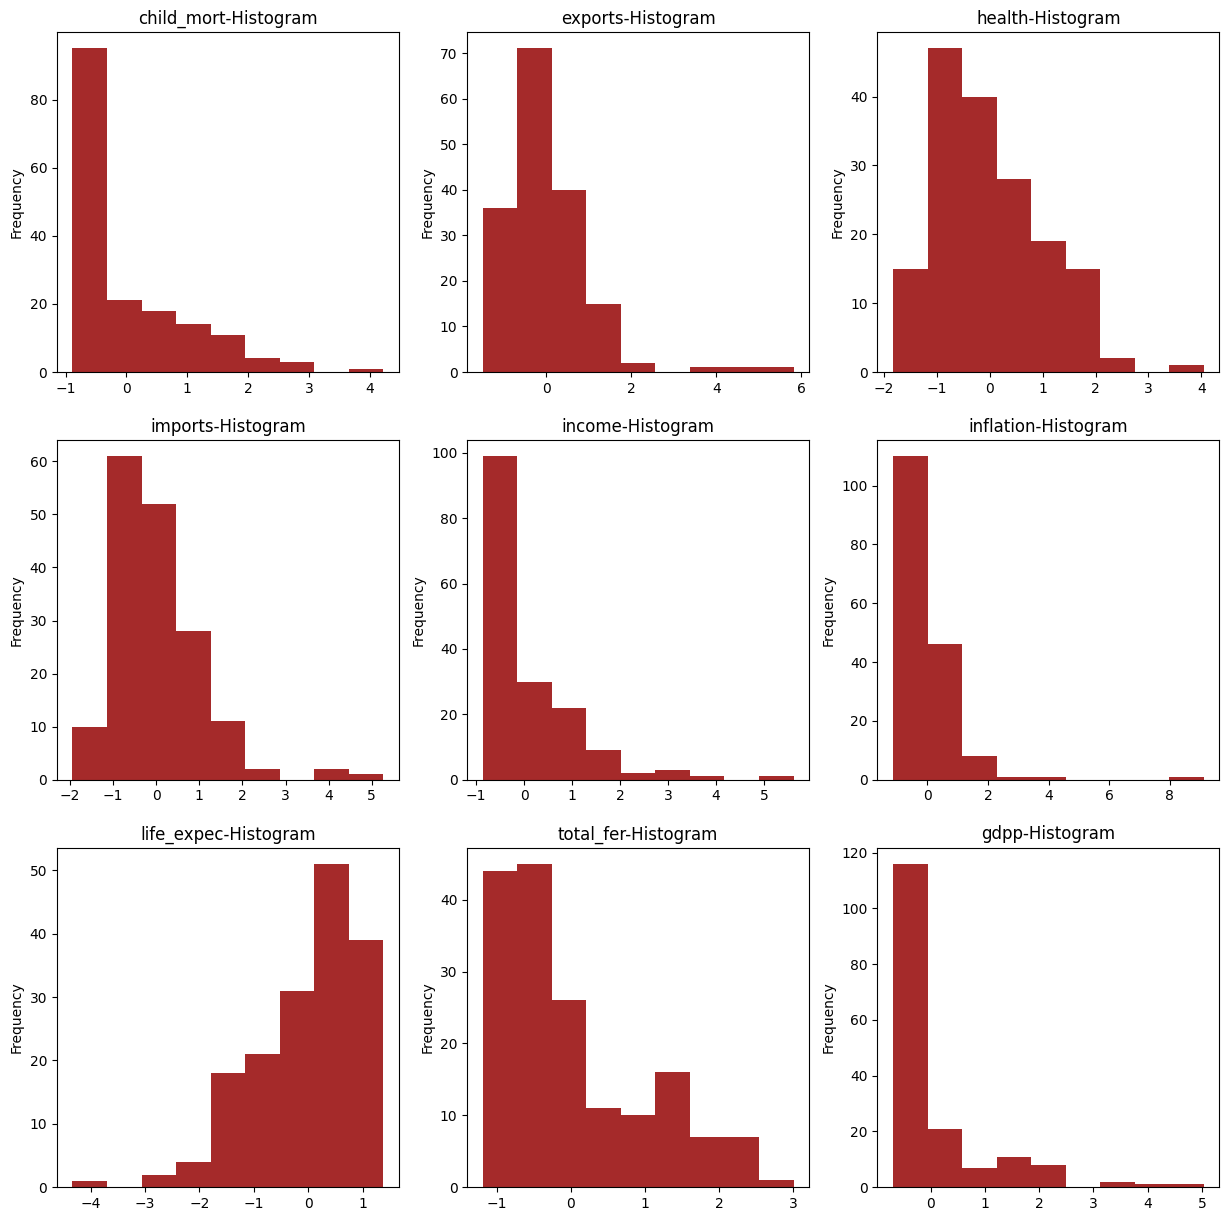

In [ ]:
visualisation_bar_hist(scaled_data)

**Principal Component Analysis (PCA)**

In [ ]:
pca=PCA()
pca_data = pd.DataFrame(pca.fit_transform(scaled_data))
pca_data.head()

0         1         2         3         4         5         6  \
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597  0.383000   
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579  0.248919   
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696 -0.087214   
3 -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996 -0.440835   
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919  0.241978   

          7         8  
0  0.415076 -0.014148  
1 -0.221042  0.173316  
2 -0.184162  0.084037  
3 -0.355998 -0.091339  
4 -0.023681  0.094270

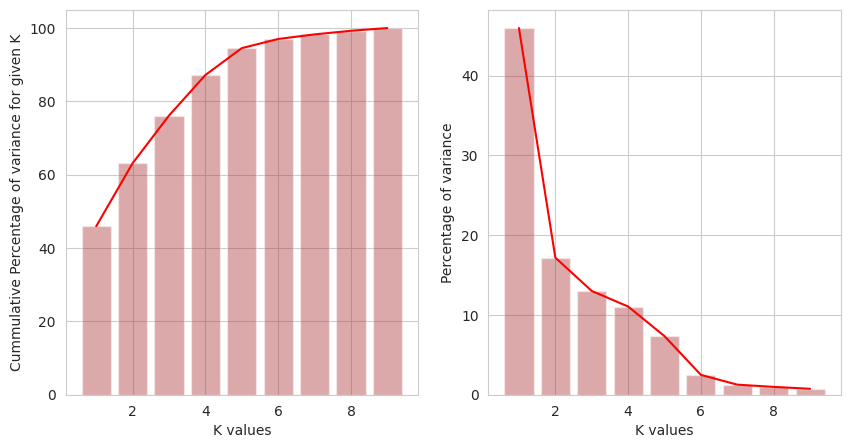

In [ ]:
temp_vars=pca.explained_variance_
total_var=sum(temp_vars)
cur_var=0
per_values=[]
per_values1=[]
k_values=[]
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))

for i in range(len(temp_vars)):
  cur_var=cur_var+temp_vars[i]
  per_values1.append(100*(temp_vars[i]/total_var))
  per_values.append(100*cur_var/total_var)
  k_values.append(i+1)

plt.subplot(1,2,1)
plt.plot(k_values,per_values,c="red")
plt.bar(k_values,per_values,alpha=0.4,color="brown")
plt.xlabel("K values")
plt.ylabel("Cummulative Percentage of variance for given K")

plt.subplot(1,2,2)
plt.plot(k_values,per_values1,c="red")
plt.bar(k_values,per_values1,alpha=0.4,color="brown")
plt.xlabel("K values")
plt.ylabel("Percentage of variance")
plt.show()

**Choosing 5 PCA**

In [ ]:
print("Percentage of variance conserved = ",per_values[4])

Percentage of variance conserved =  94.53099756439512


In [ ]:
pca_data=pca_data.drop(columns=[5,6,7,8])
pca_data.head()

0         1         2         3         4
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475
3 -2.932423  1.695555  1.525044  0.839625 -0.273209
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007

**Visualising the Data in PCA feature space**

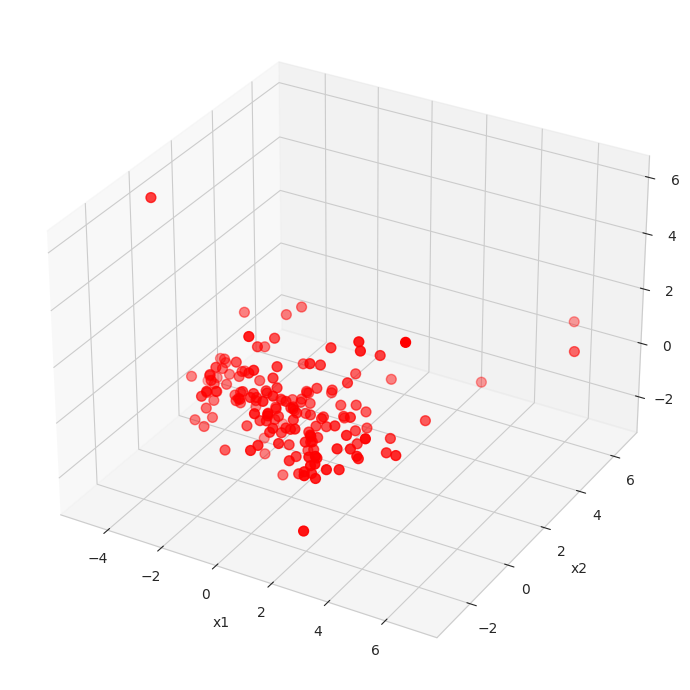

In [ ]:
plt.figure(figsize = (7, 7))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(pca_data[0],pca_data[1], pca_data[2],c="red",s=50)
plt.tight_layout ()
plot_axes.set_xlabel("x1")
plot_axes.set_ylabel("x2")
plot_axes.set_zlabel("x3")
plt.show()

**K-Means Clustering**

**Using Original Data**

**Finding Best Value for Number of clusters using Elbow Method and Silhouette Score Method**

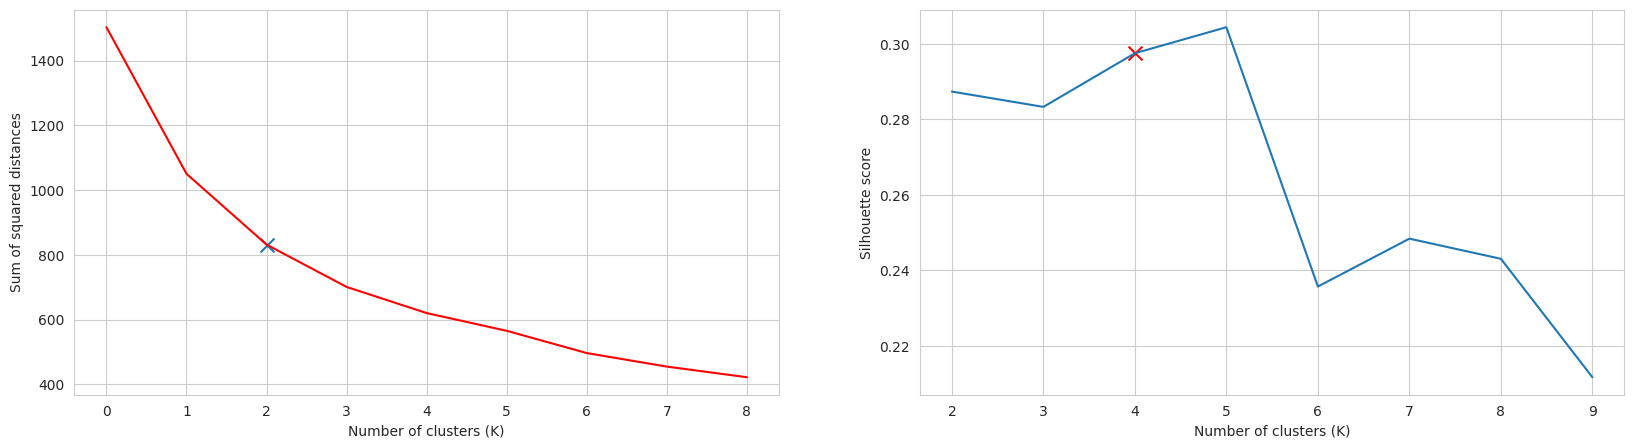

In [ ]:
#For Elbow Method
#Plotting sum of squared distances vs k

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.set_style("white")
sum_of_squares=[]
for i in range(1,10):
  model=KMeans(n_clusters=i)
  model.fit(scaled_data)
  sum_of_squares.append(model.inertia_)

#For silhouette score method
#plotting silhouette score vs k
sil_score=[]
for i in range(2,10):
  model=KMeans(n_clusters=i)
  model.fit(scaled_data)
  labels=model.labels_
  sil_score.append(silhouette_score(scaled_data,labels,metric="euclidean"))

plt.subplot(1,2,1)
plt.plot(sum_of_squares,c="red")
plt.scatter(2,sum_of_squares[2],marker="x",s=100)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of squared distances")

plt.subplot(1,2,2)
plt.plot(np.arange(2,10,1),sil_score)
optimal_pt=4
plt.scatter(optimal_pt,sil_score[optimal_pt-2],marker="x",c="red",s=100)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette score")
plt.show()

**Taking Average of the both we get K=3**

Visualising the clusters formed when K=3 on original data

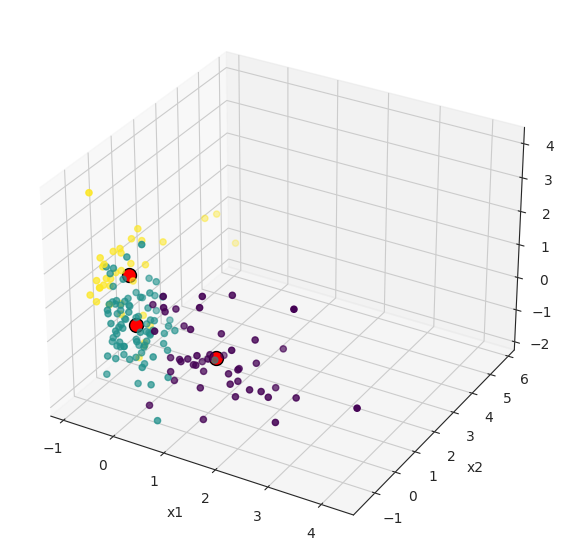

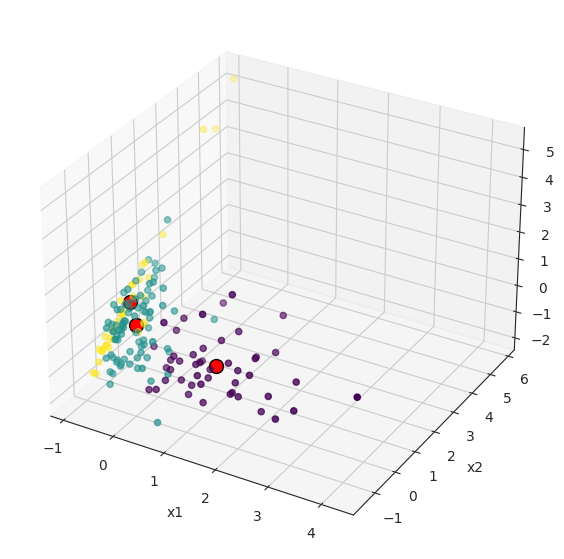

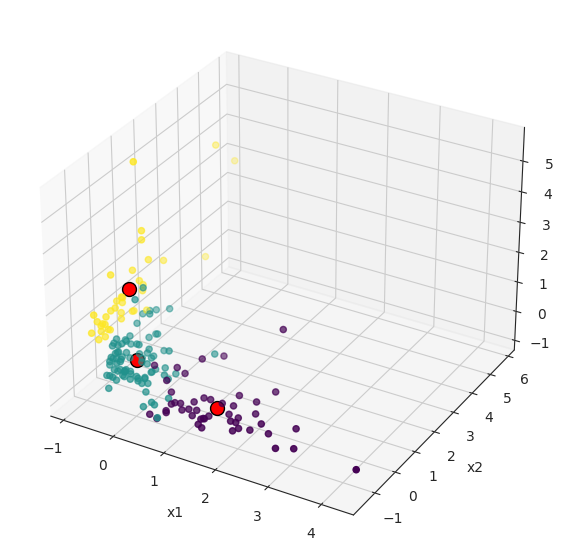

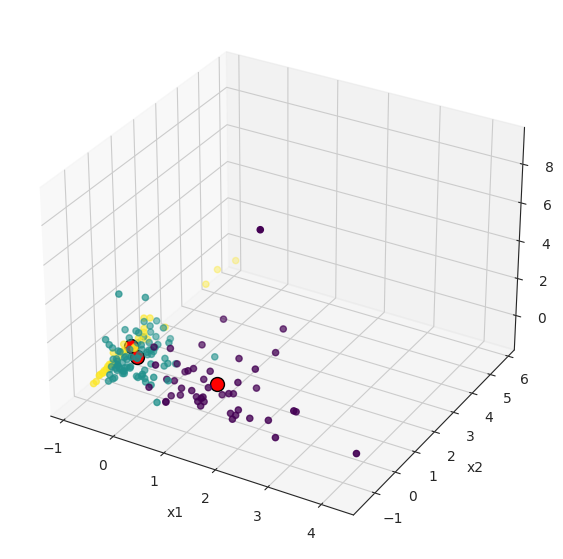

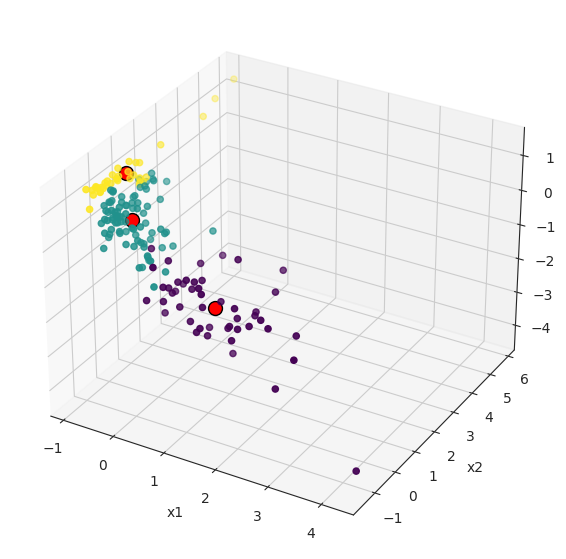

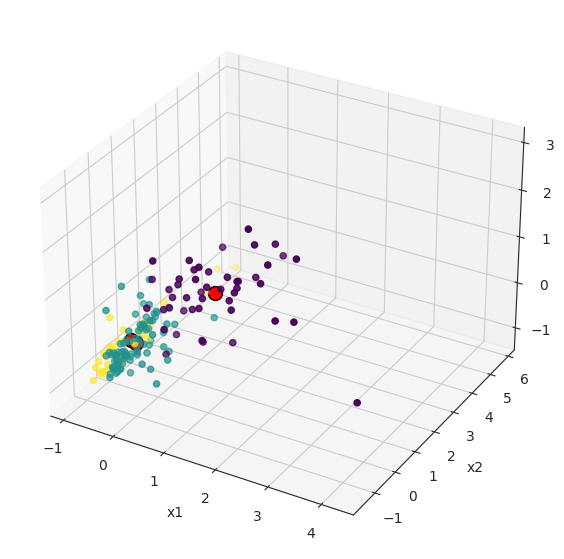

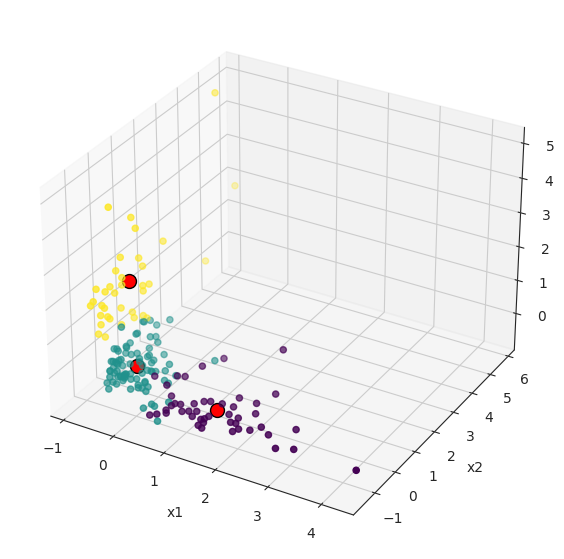

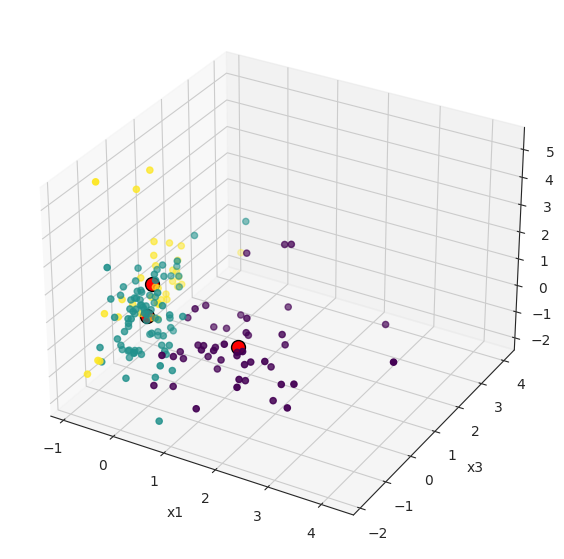

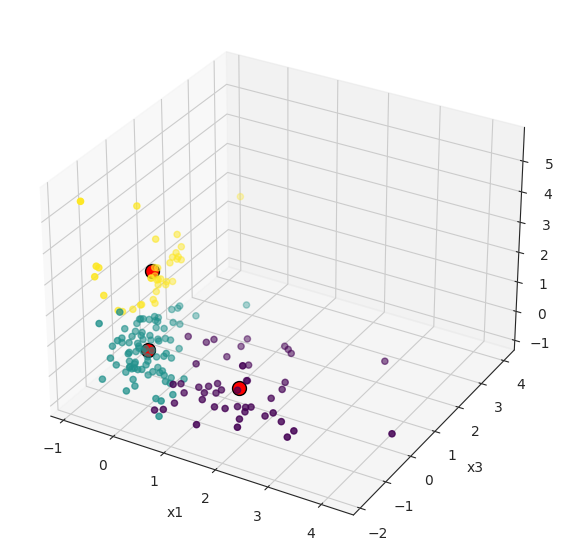

In [ ]:

def visualise_clusters_3d(model,x_train):
  clusters=model.cluster_centers_
  count=1
  row=0
  column=0
  # fig=plt.subplots(nrows = 2, ncols = 5, figsize = (5,5))
  sns.set_style("white")
  for i in range(len(clusters[0])):
    for j in range(i+1,len(clusters[0])):
      for k in range(j+1,len(clusters[0])):
        if (count>=10):
          return None

        fig = plt.figure(figsize=(7,7))
        ax = plt.axes(projection ="3d")

        ax.scatter3D(x_train[:,i],x_train[:,j],x_train[:,k],c=model.labels_,cmap="viridis")

        for l in range(len(clusters)):
          ax.scatter3D(clusters[l,i],clusters[l,j],clusters[l,k],c="red",marker="o",s=100,edgecolor="black")

        ax.set_xlabel("x"+str(i+1))
        ax.set_ylabel("x"+str(j+1))
        ax.set_zlabel("x"+str(k+1))

        count=count+1
        plt.show()

model1=KMeans(n_clusters=3)
model1.fit(scaled_data)
visualise_clusters_3d(model1,np.array(scaled_data))

> 0 : No Help Needed


> 1 : Help Needed


>2 : Might Need Help later on if continued like this


In [ ]:
out_scaled_data=original_data.copy(deep=True)
out_scaled_data["Class"]=pd.DataFrame(model1.labels_)
out_scaled_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Class  
0       9.44        56.2       5.82    553      0  
1       4.49        76.3       1.65   4090      1  
2      16.10        76.5       2.89   4460      1  
3      22.40        60.1       6.16   3530      0  
4       1.44        76.8       2.13  12200      1

**Representing the final result**

In [ ]:
out_scaled_data['Class'].loc[out_scaled_data['Class'] == 2] = 'No Help Needed'
out_scaled_data['Class'].loc[out_scaled_data['Class'] == 0] = 'Help Needed'
out_scaled_data['Class'].loc[out_scaled_data['Class'] == 1] = 'Might Need Help Later on'

fig = px.choropleth(out_scaled_data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = out_scaled_data['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help Later on':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')

**Now Repeating the same Procedure but using the PCA data**

**Finding Best Value for Number of clusters using Elbow Method and Silhouette Score Method**

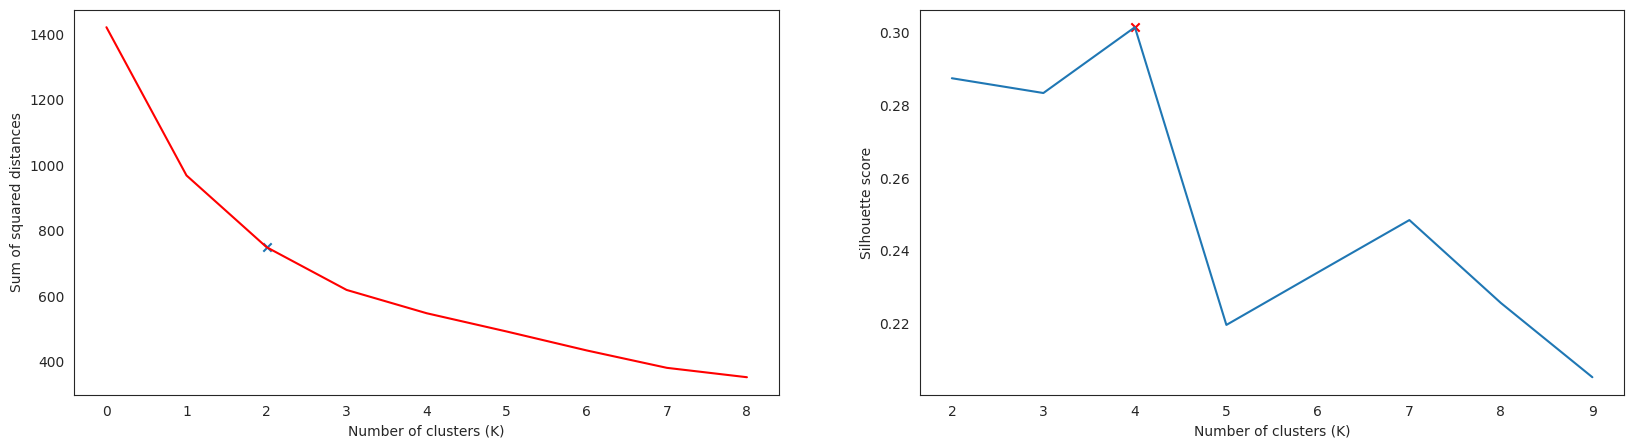

In [ ]:
#For Elbow Method
#Plotting sum of squared distances vs k

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.set_style("white")
sum_of_squares=[]
for i in range(1,10):
  model=KMeans(n_clusters=i)
  model.fit(pca_data)
  sum_of_squares.append(model.inertia_)

#For silhouette score method
#plotting silhouette score vs k
sil_score=[]
for i in range(2,10):
  model=KMeans(n_clusters=i)
  model.fit(pca_data)
  labels=model.labels_
  sil_score.append(silhouette_score(scaled_data,labels,metric="euclidean"))

plt.subplot(1,2,1)
plt.plot(sum_of_squares,c="red")
plt.scatter(2,sum_of_squares[2],marker="x")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of squared distances")

plt.subplot(1,2,2)
plt.plot(np.arange(2,10,1),sil_score)
optimal_pt=4
plt.scatter(optimal_pt,sil_score[optimal_pt-2],marker="x",c="red")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette score")
plt.show()

**Taking Average of the both we get K=3**

Visualising the clusters formed when K=3 on original data

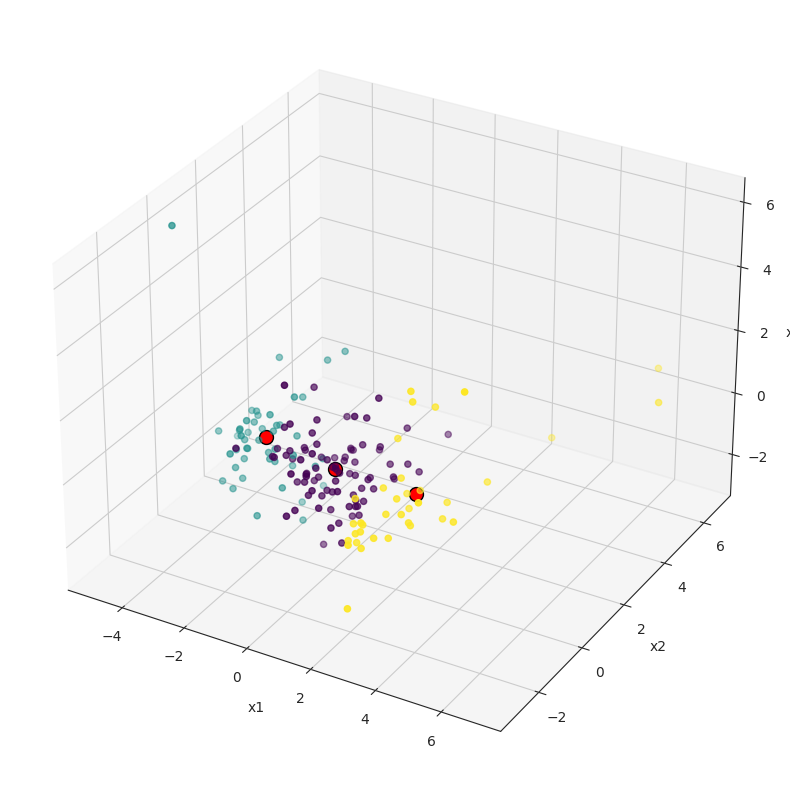

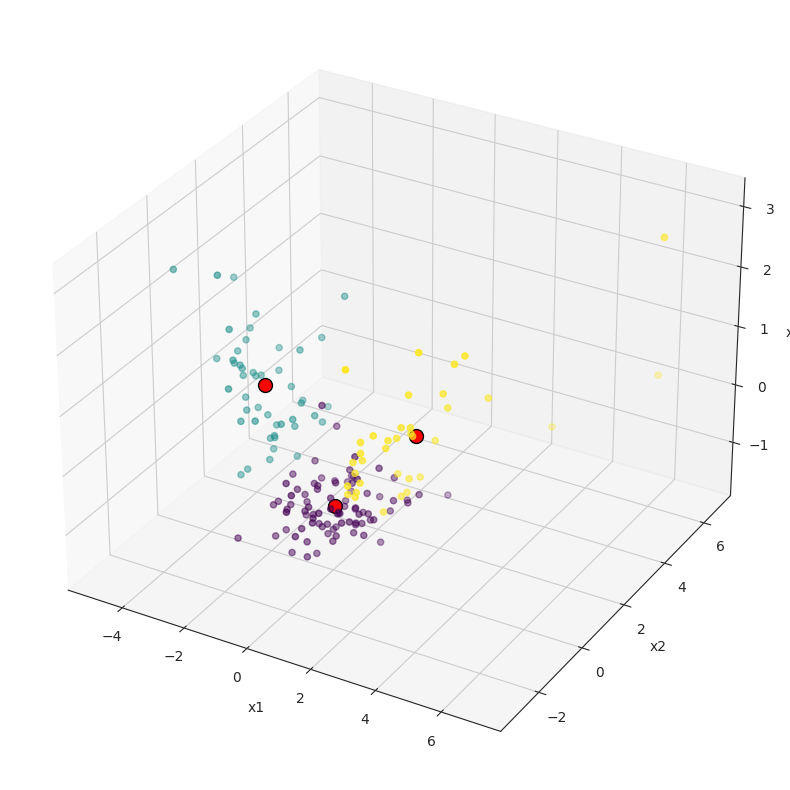

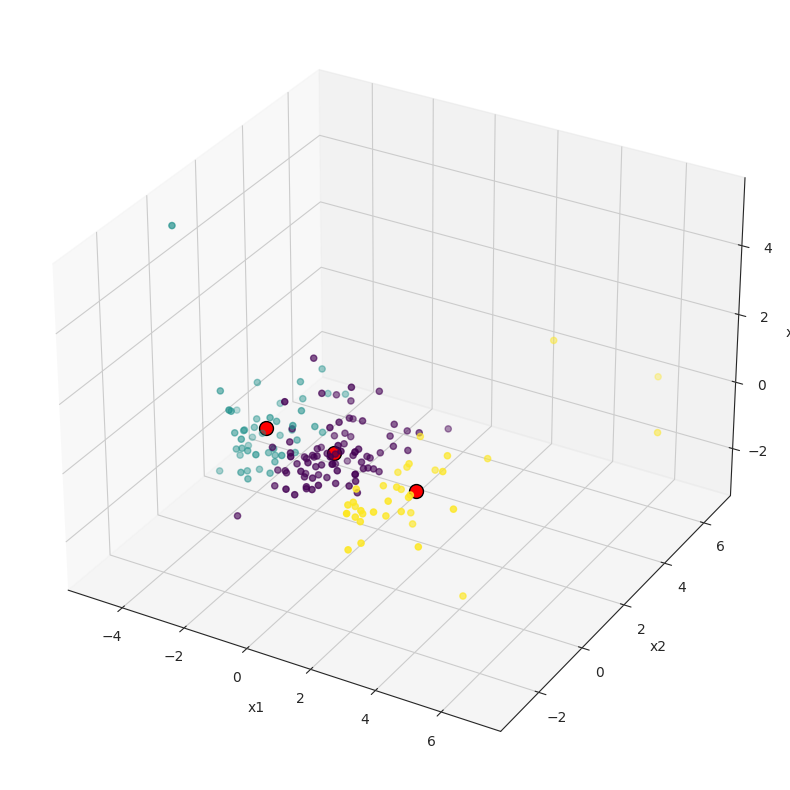

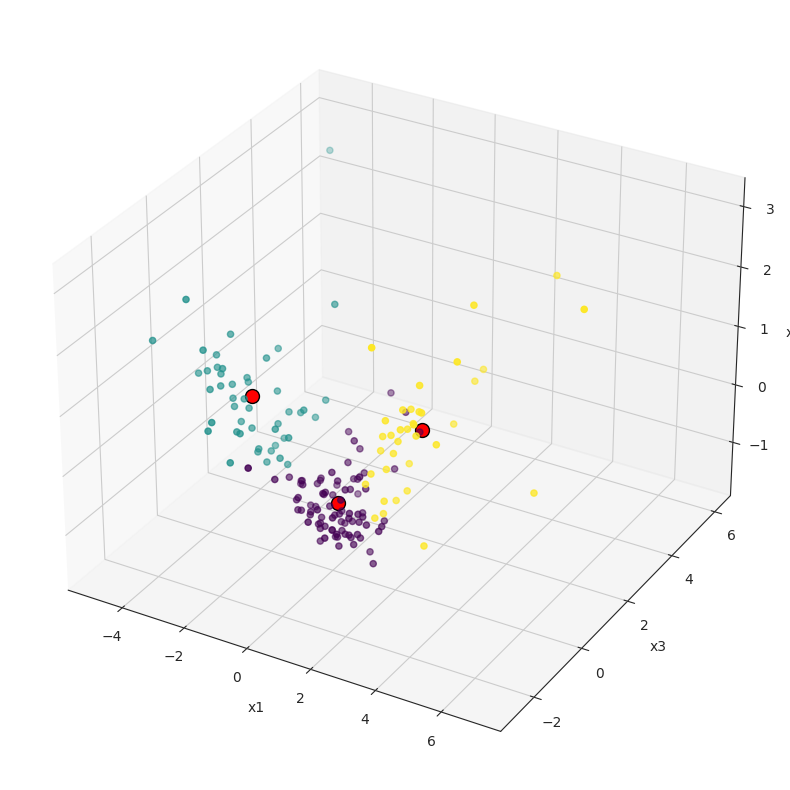

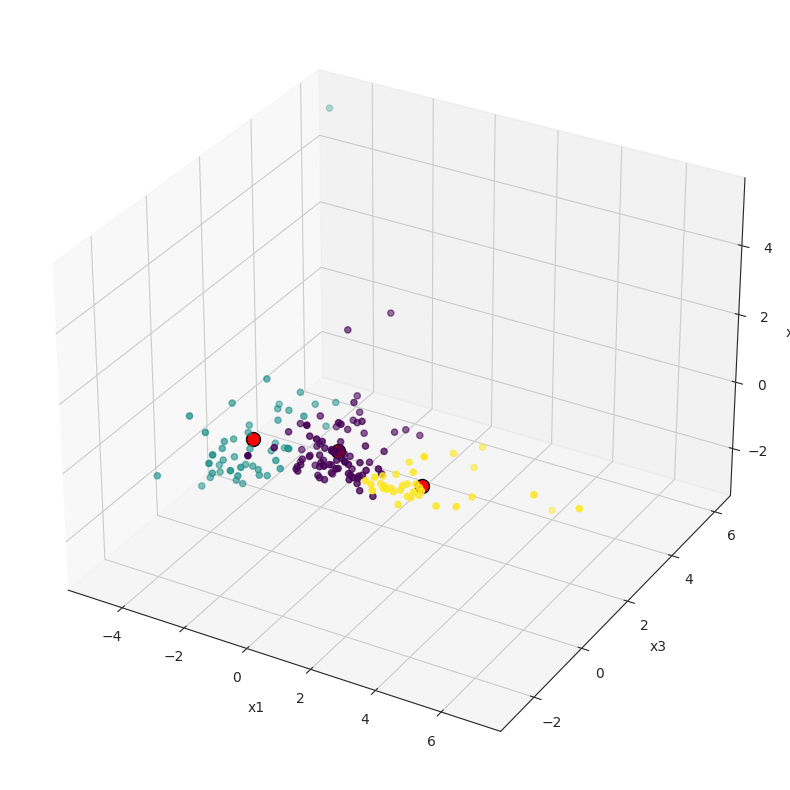

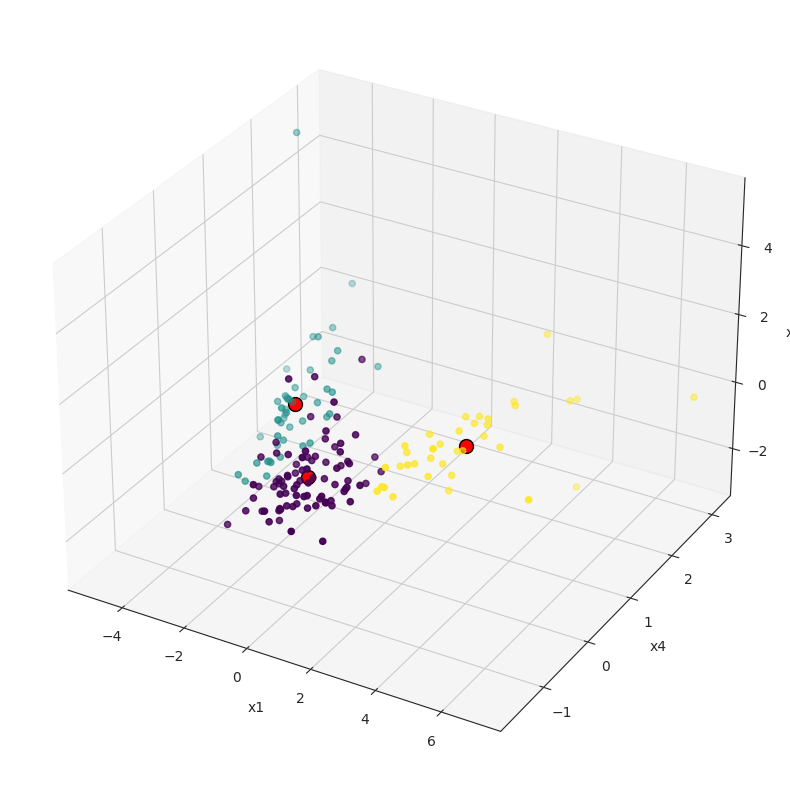

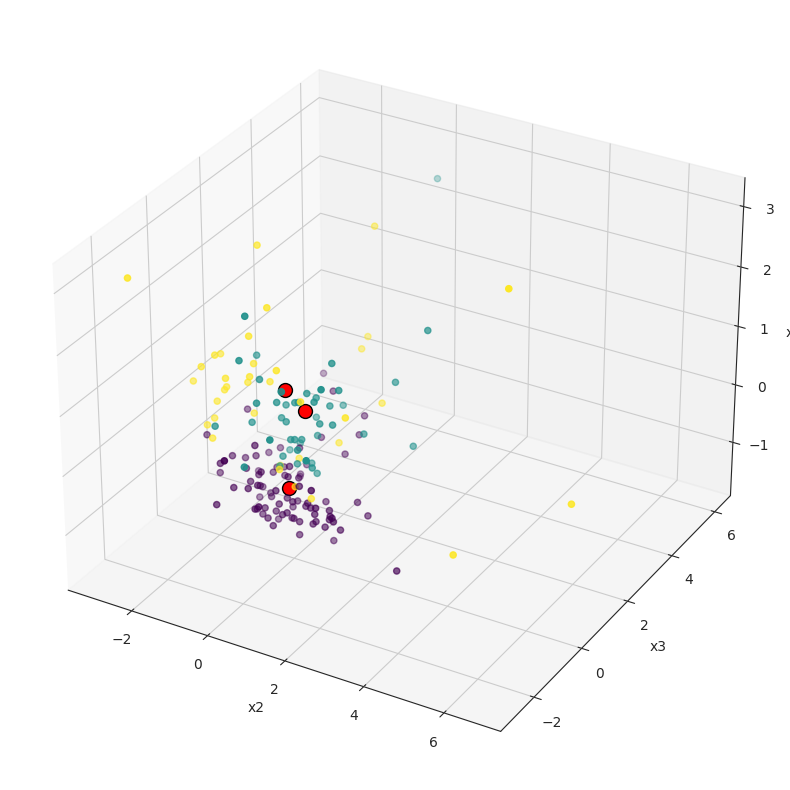

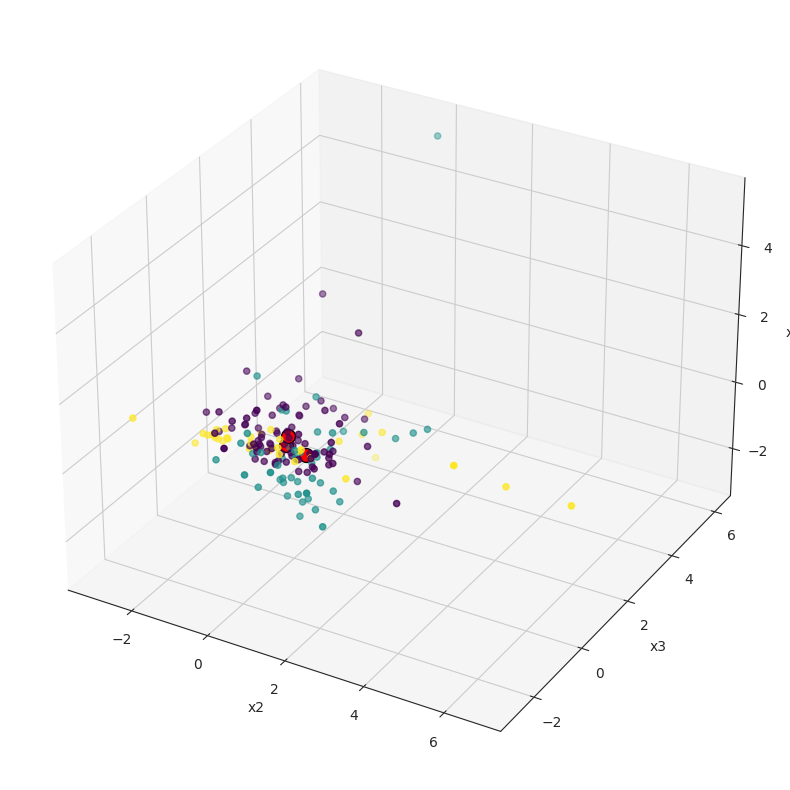

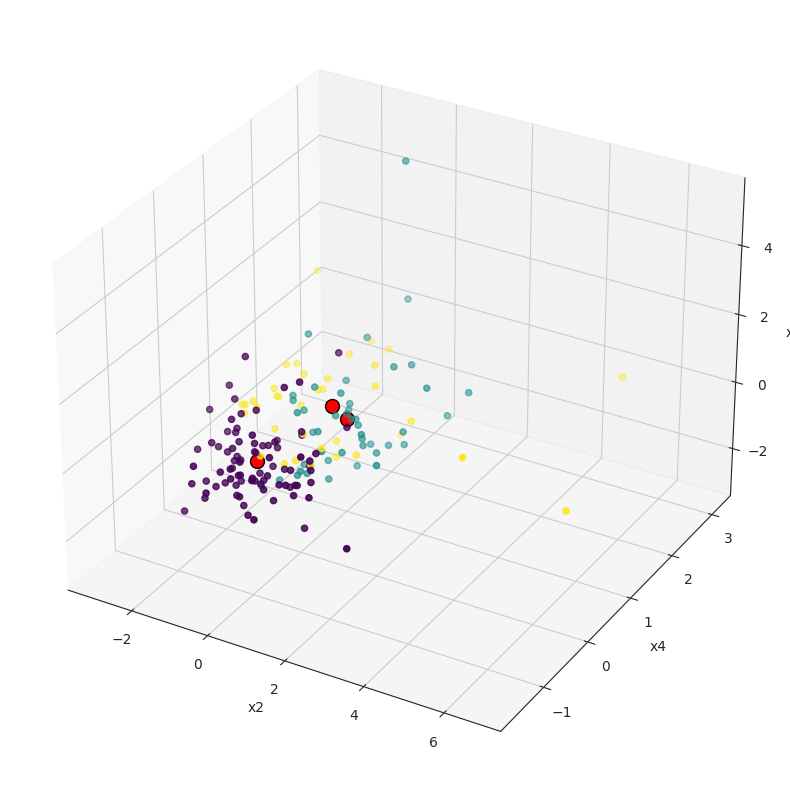

In [ ]:

def visualise_clusters_3d(model,x_train):
  clusters=model.cluster_centers_
  count=1
  row=0
  column=0
  # fig=plt.subplots(nrows = 2, ncols = 5, figsize = (5,5))
  sns.set_style("white")
  for i in range(len(clusters[0])):
    for j in range(i+1,len(clusters[0])):
      for k in range(j+1,len(clusters[0])):
        if (count>=10):
          return None

        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ="3d")

        ax.scatter3D(x_train[:,i],x_train[:,j],x_train[:,k],c=model.labels_,cmap="viridis")

        for l in range(len(clusters)):
          ax.scatter3D(clusters[l,i],clusters[l,j],clusters[l,k],c="red",marker="o",s=100,edgecolor="black")

        ax.set_xlabel("x"+str(i+1))
        ax.set_ylabel("x"+str(j+1))
        ax.set_zlabel("x"+str(k+1))

        count=count+1
        plt.show()

model2=KMeans(n_clusters=3)
model2.fit(pca_data)
visualise_clusters_3d(model2,np.array(pca_data))

> 0 : Might Need Help later on if continued like this


> 1 : Help Needed


>2 : No Help Needed


In [ ]:
out_pca_data=original_data.copy(deep=True)
out_pca_data["Class"]=pd.DataFrame(model2.labels_)
out_pca_data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Class  
0         9.44        56.2       5.82    553      1  
1         4.49        76.3       1.65   4090      0  
2        16.10        76.5       2.89   4460      0  
3        22.40        60.1       6.16   3530      1  
4         1.44        76.8       2.13  12200      0  
..         ...         ...        ...    ...    ...  
162       2.62        63.0       3.50   2970      0  
163      45.90        75.4       2.47  13500      0  
164      12.10        73.1       1.95   1310      0  
165      23.60        67.5       4.67   1310      1  
166      14.00        52.0       5.40   1460      1  

[167 rows x 11 columns]

**Representing the final result**

In [ ]:
out_pca_data['Class'].loc[out_pca_data['Class'] == 1] = 'Might Need Help later on'
out_pca_data['Class'].loc[out_pca_data['Class'] == 2] = 'Help Needed'
out_pca_data['Class'].loc[out_pca_data['Class'] == 0] = 'No Help Needed'

fig = px.choropleth(out_pca_data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = out_pca_data['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help later on':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')

**Implementing DBScan**

Using Original Data

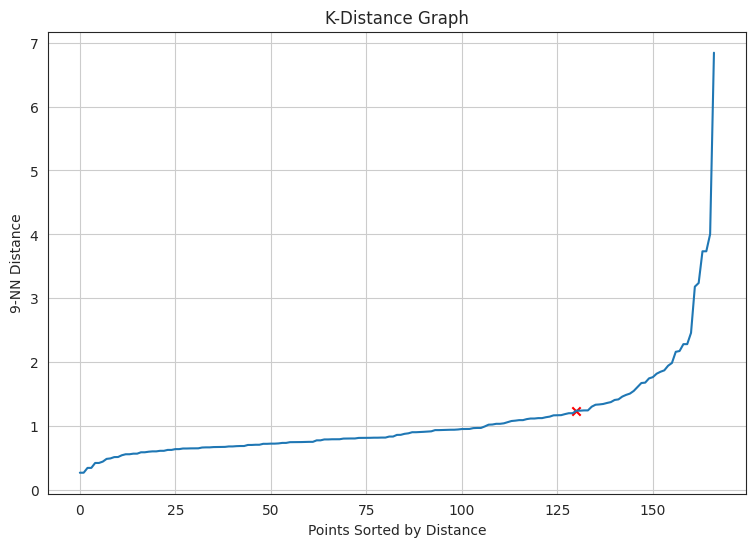

1.241159227884789


In [ ]:
fig=plt.subplots(nrows = 1, ncols = 1, figsize = (9,6))

#As we know we can choose min pts as<= 2*number of features
#k neighbours=minpts-1

minpts=9+1
model_knn=NearestNeighbors(n_neighbors = minpts-1)

model_knn.fit(scaled_data)

distances,indices=model_knn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('9-NN Distance')
plt.title('K-Distance Graph');
eps=distances[130]
plt.scatter(130,eps,marker="x",c="red")
plt.show()
print(eps)

#choosing value of eps where we have abrupt increase in the distance

**Now Using DBscan on the Data Using Obtained Values of minpts and eps**

In [ ]:
model_dbs=DBSCAN(eps = eps, min_samples = minpts)
model_dbs.fit(scaled_data)
labels=model_dbs.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

out_scaled_data_db=original_data.copy(deep=True)

out_scaled_data_db['Class'] = labels;

Number of Clusters :  3
Number of Outliers :  76


**Visualising Clusters**

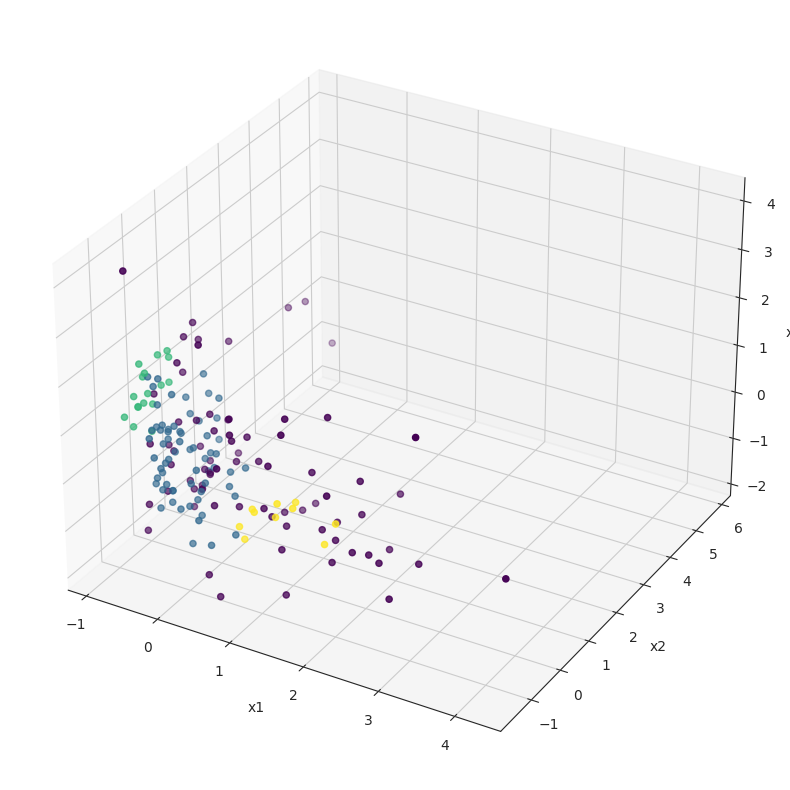

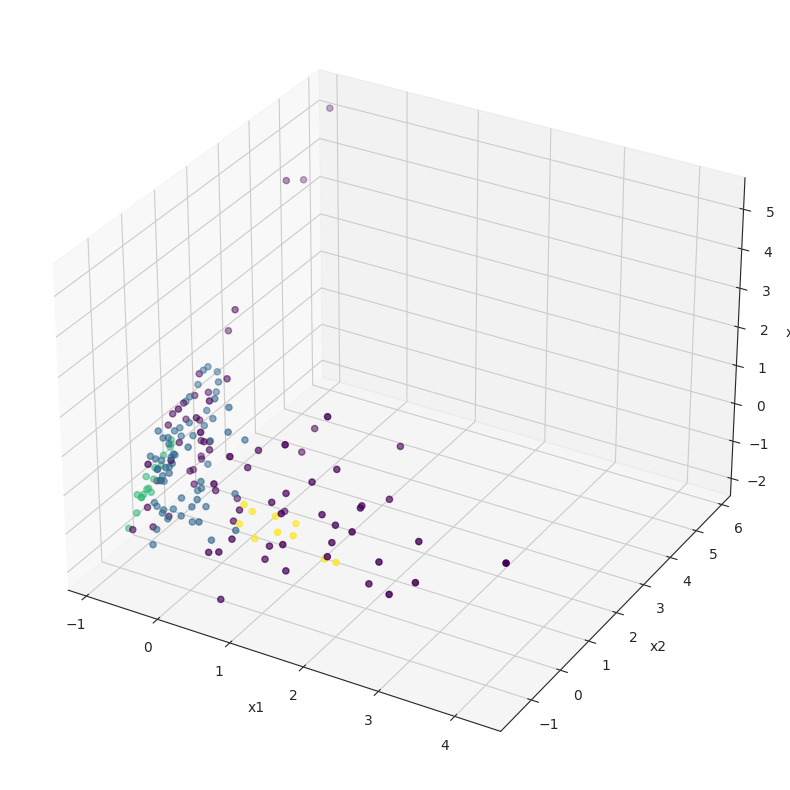

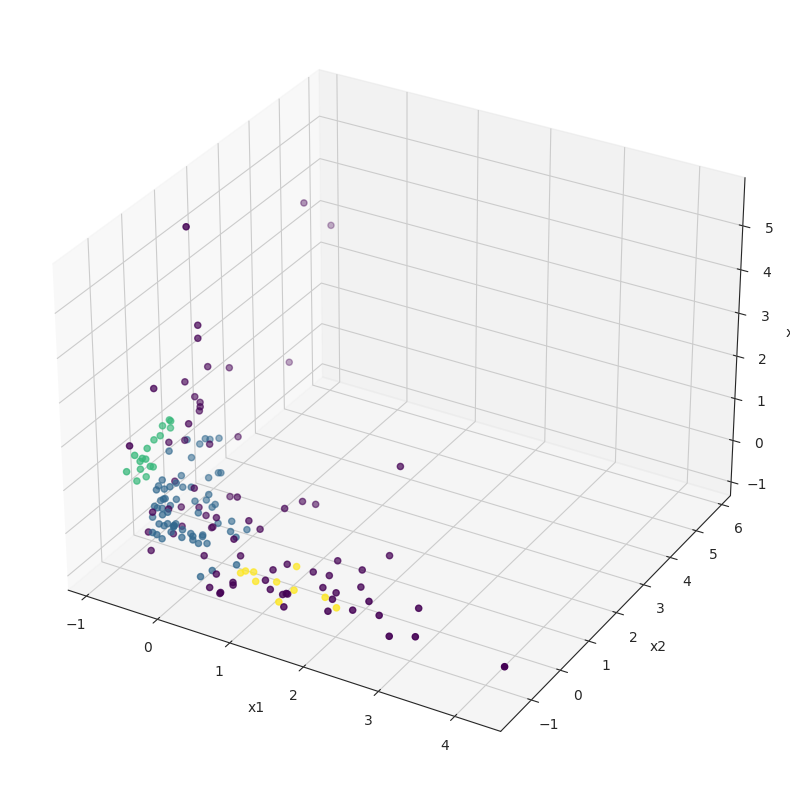

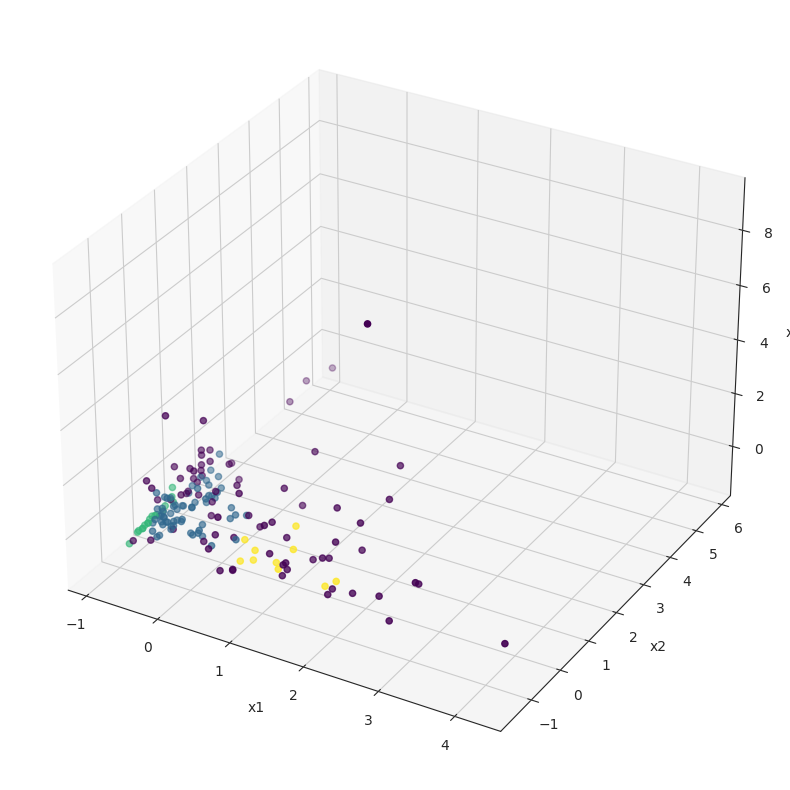

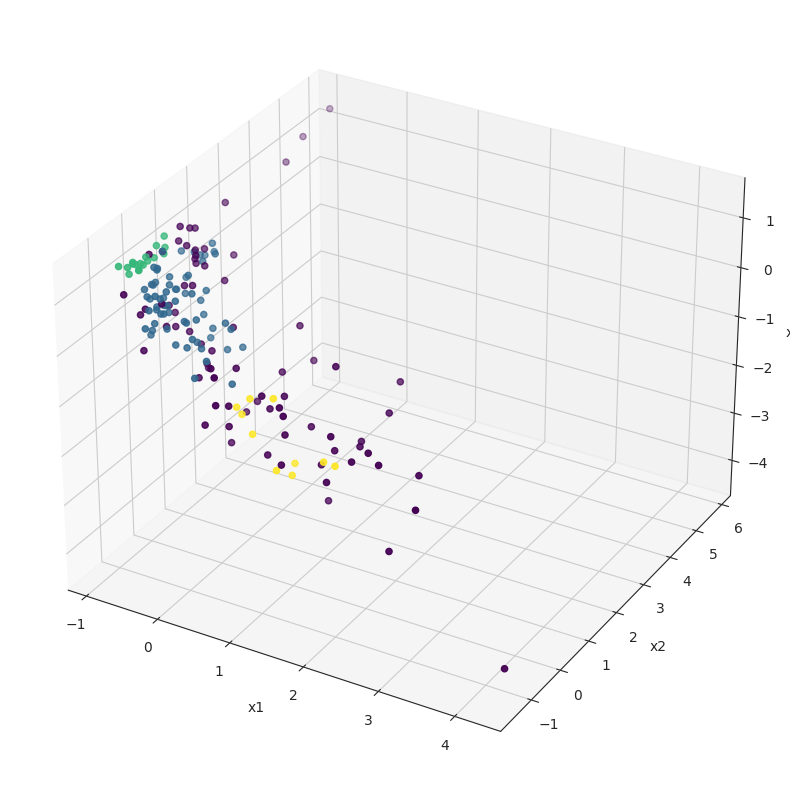

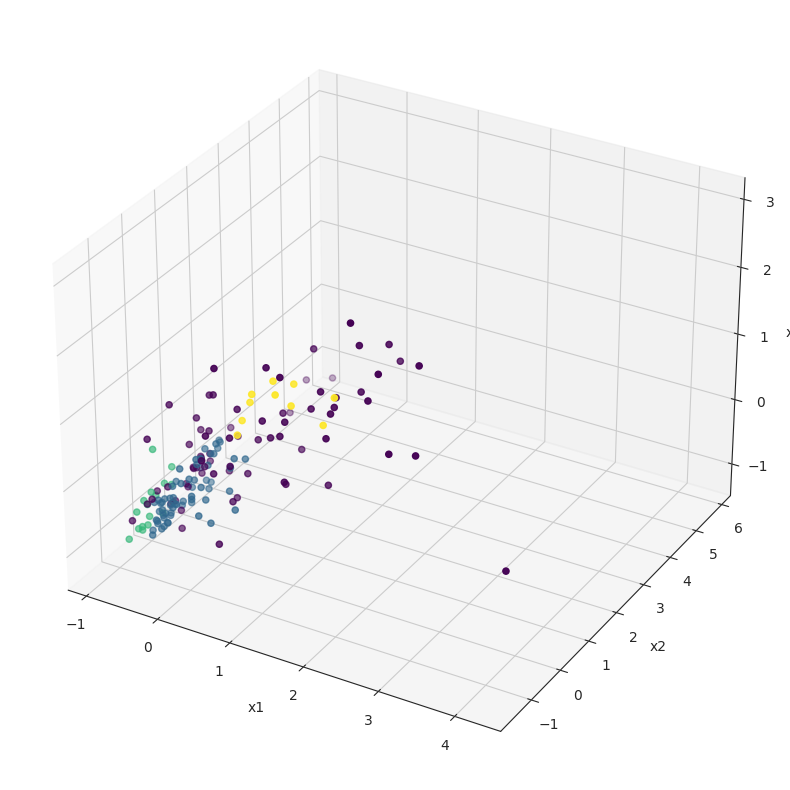

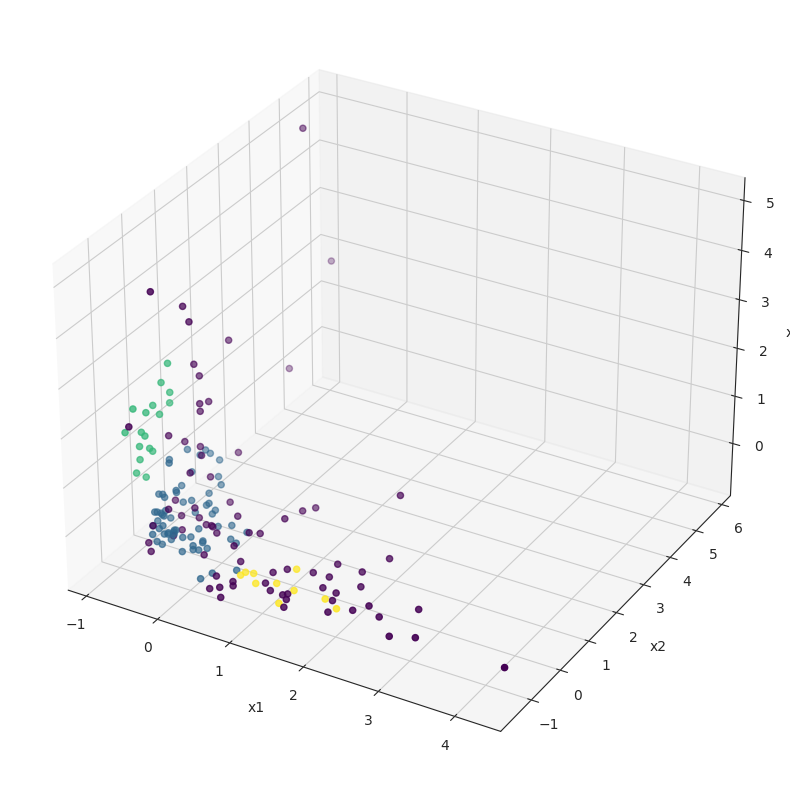

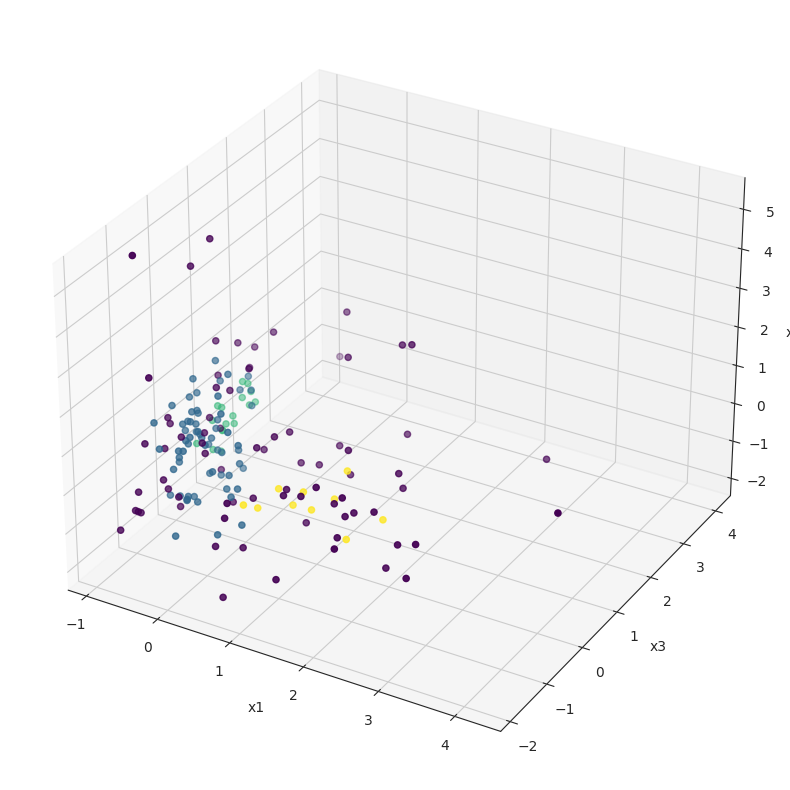

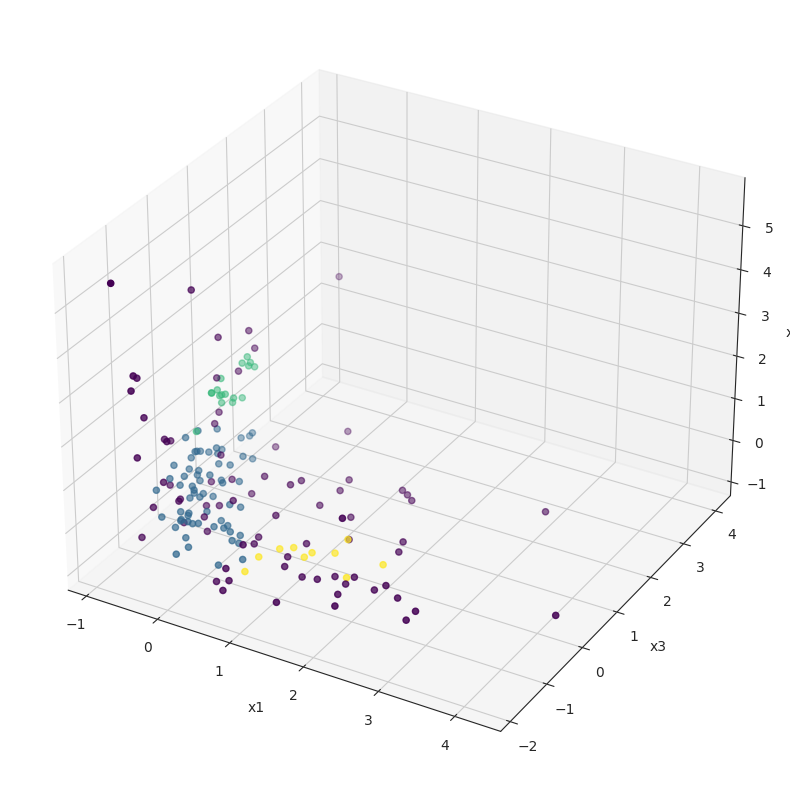

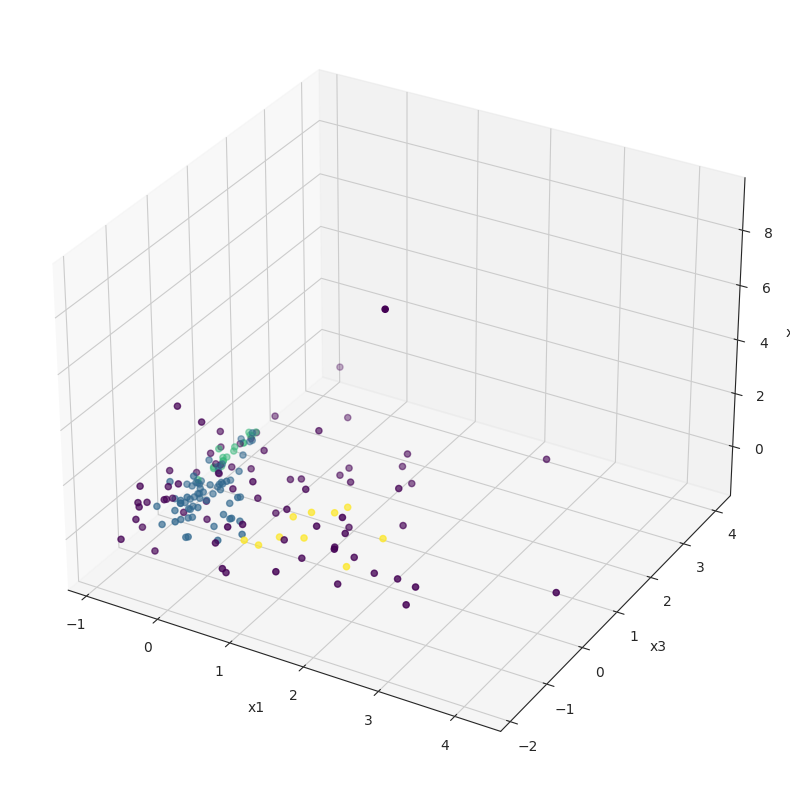

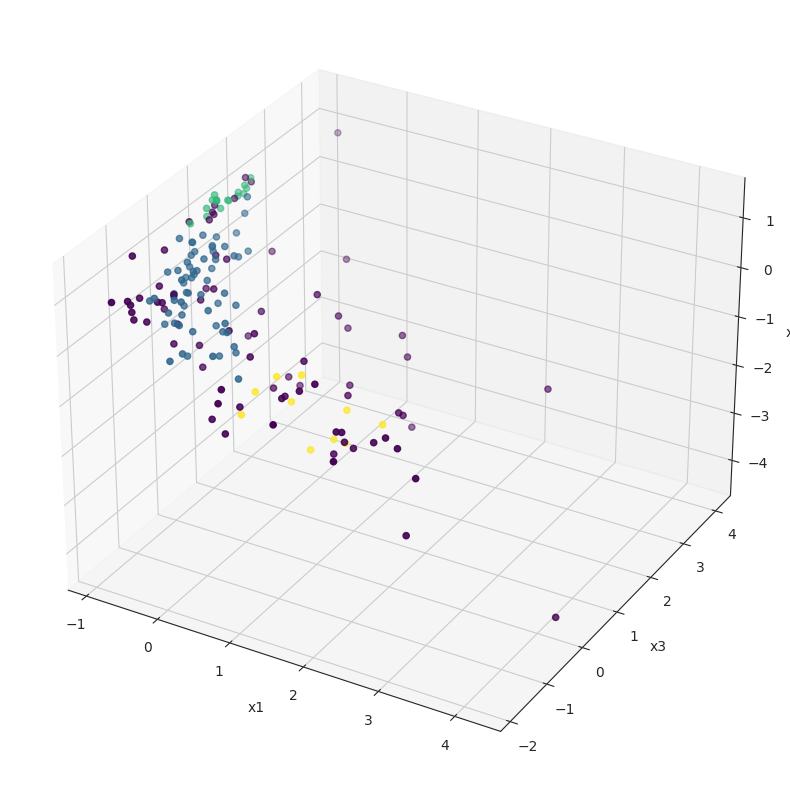

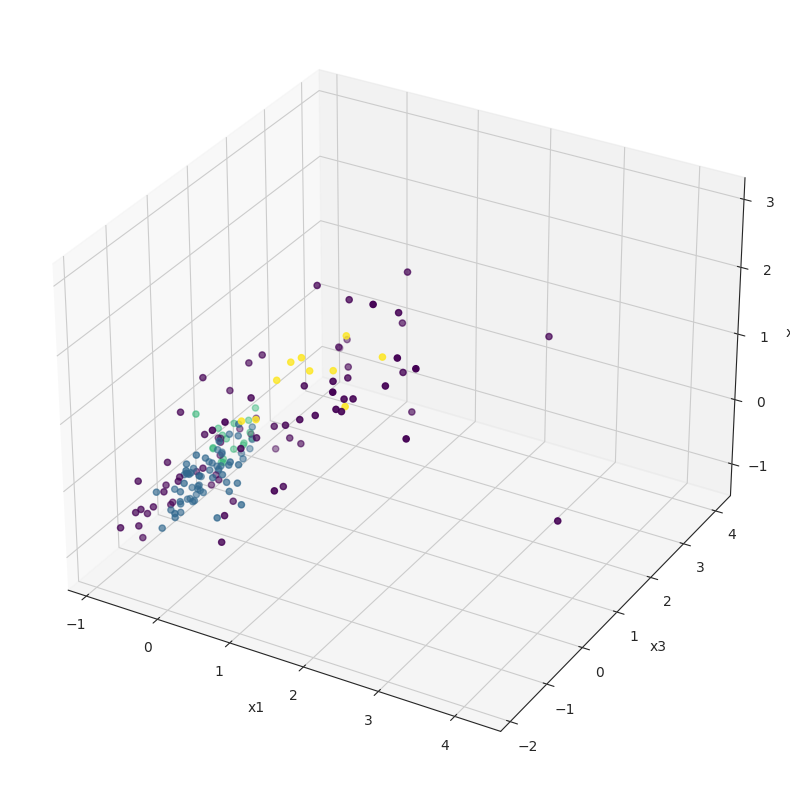

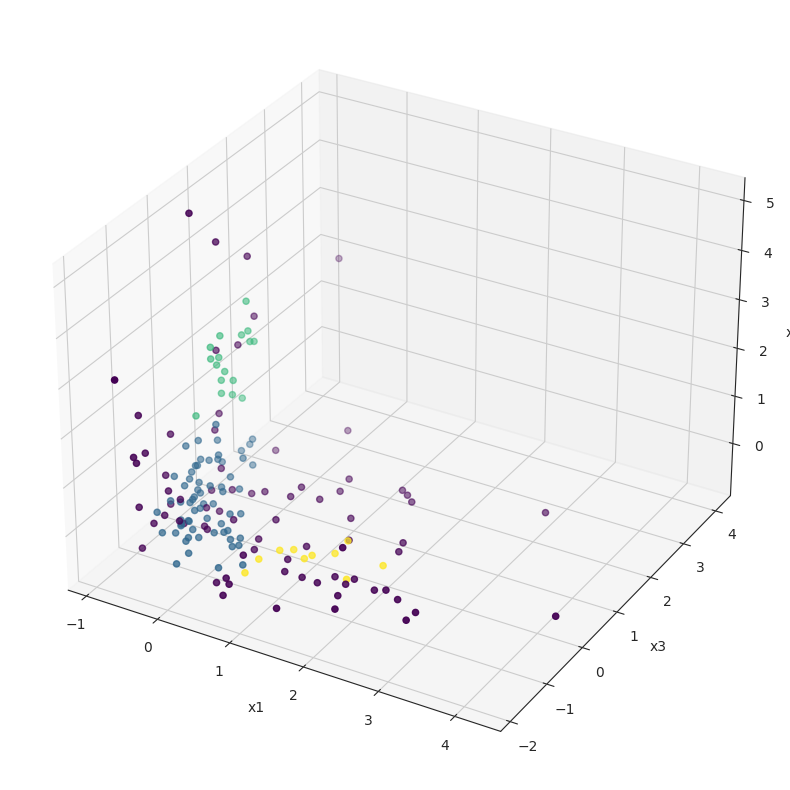

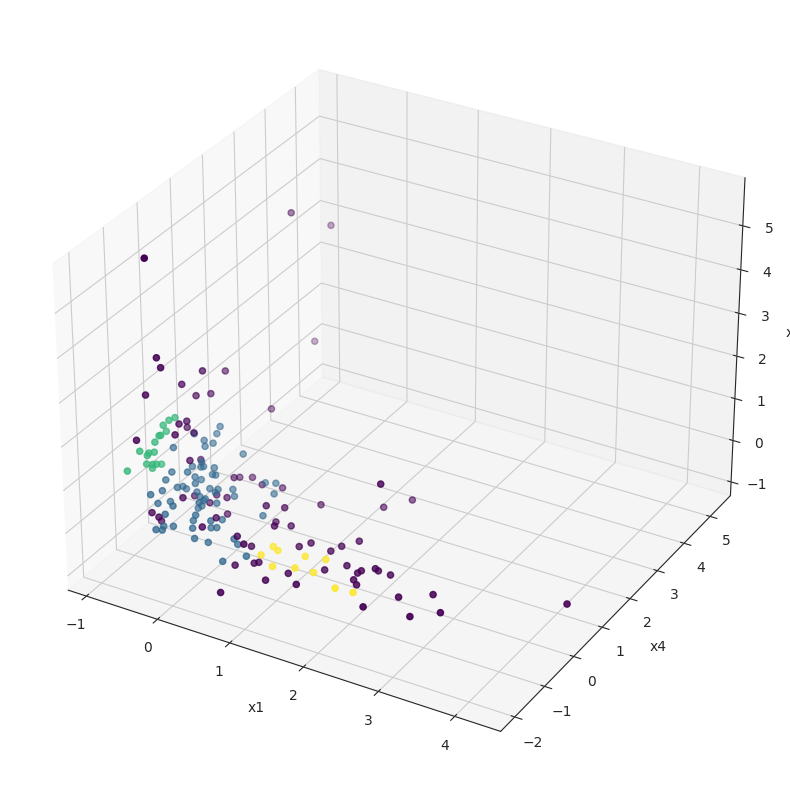

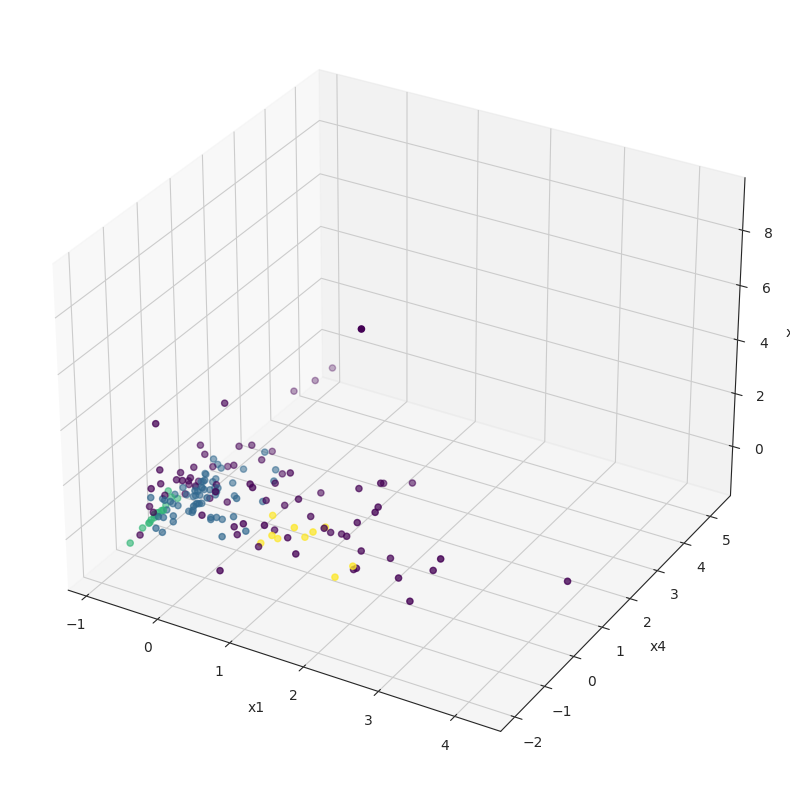

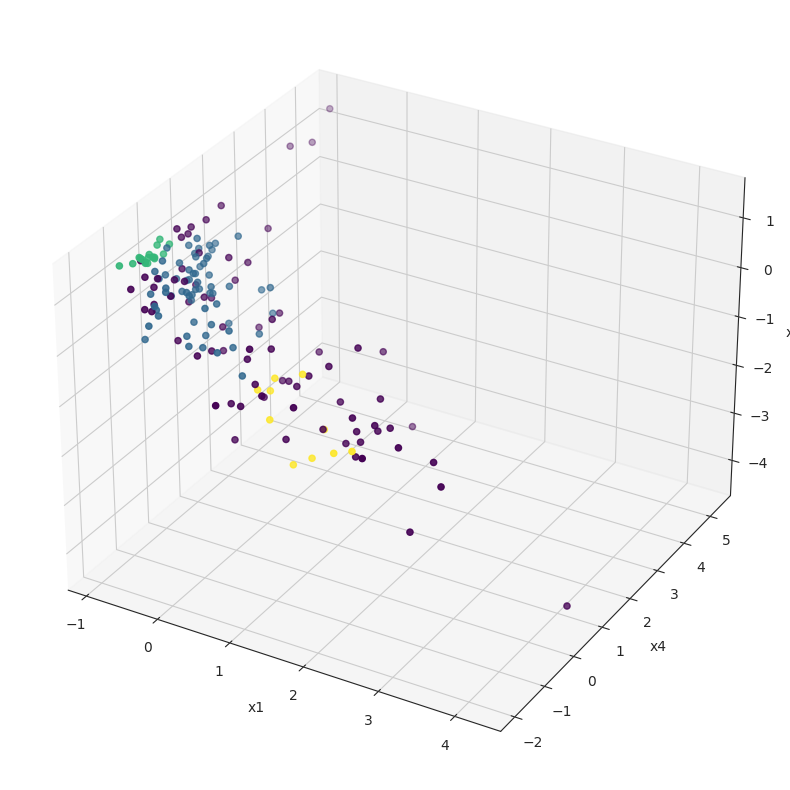

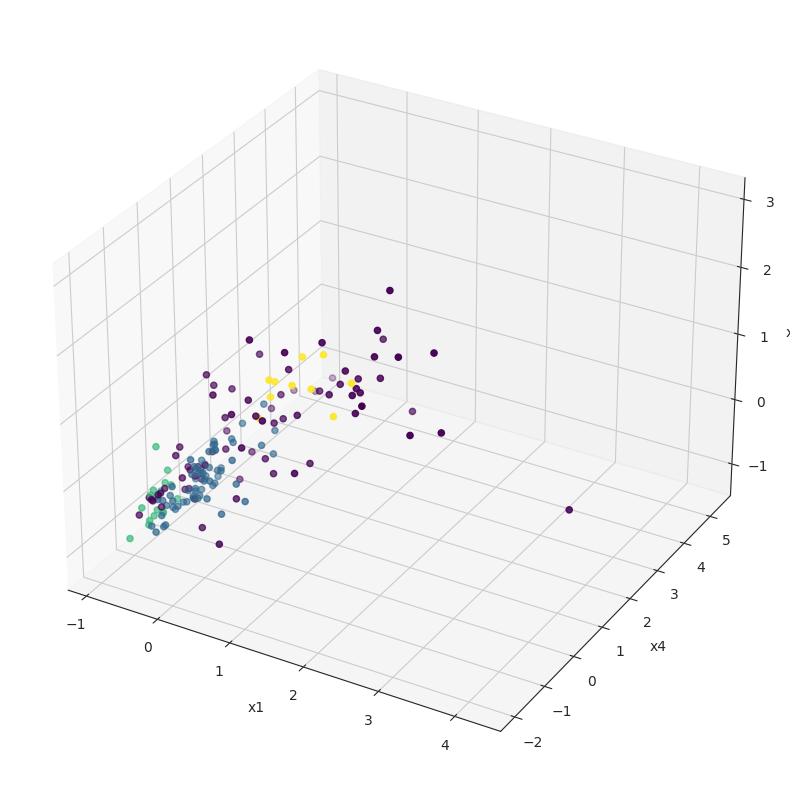

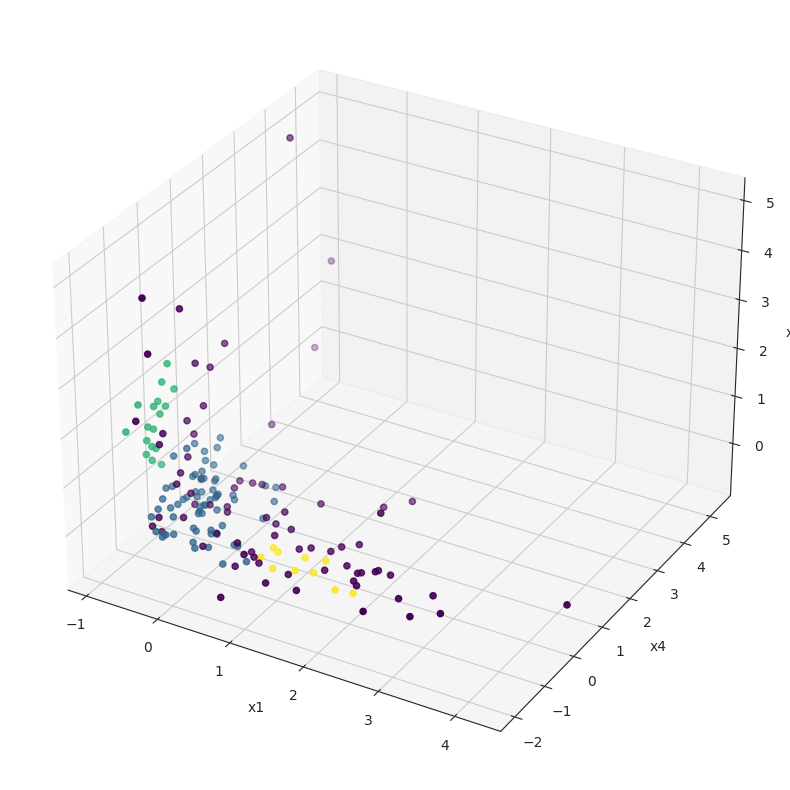

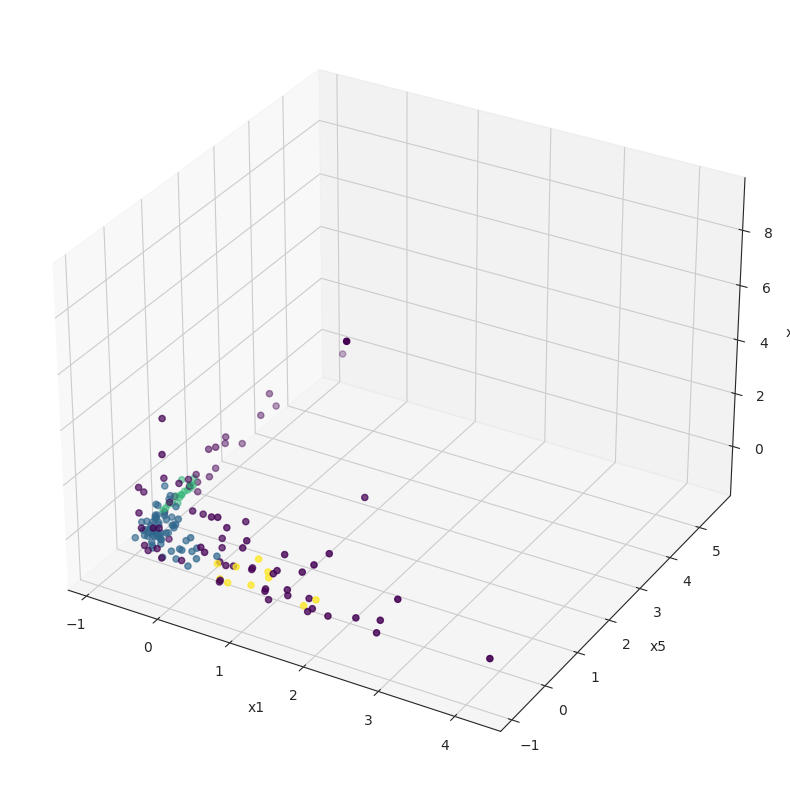

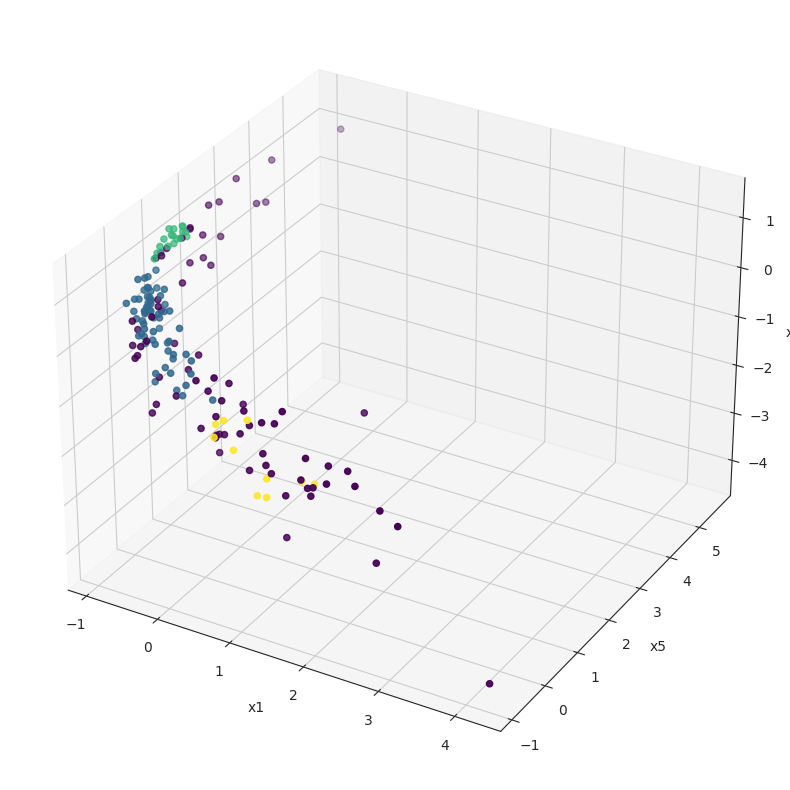

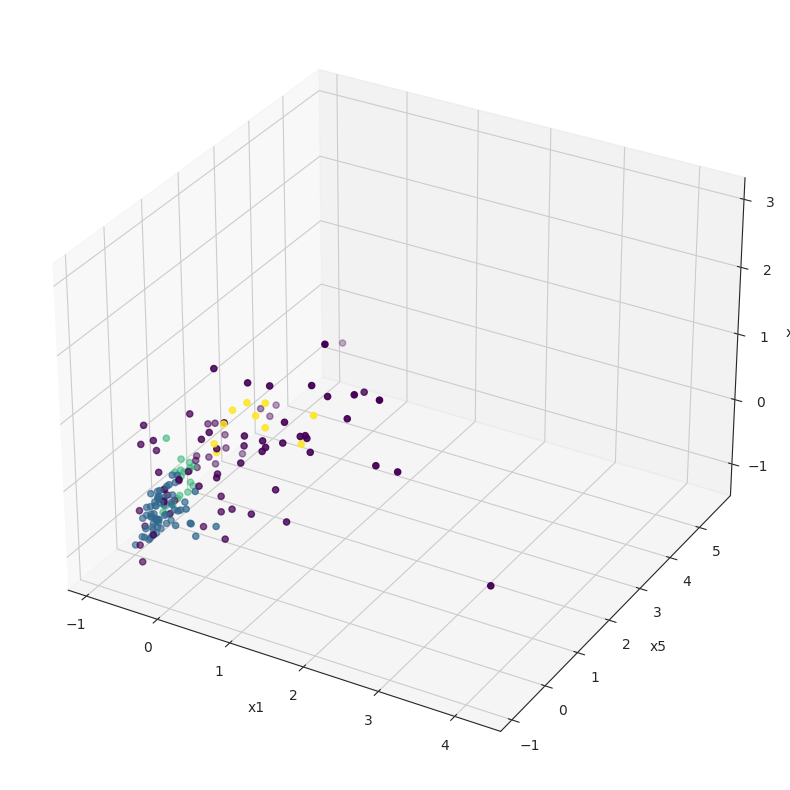

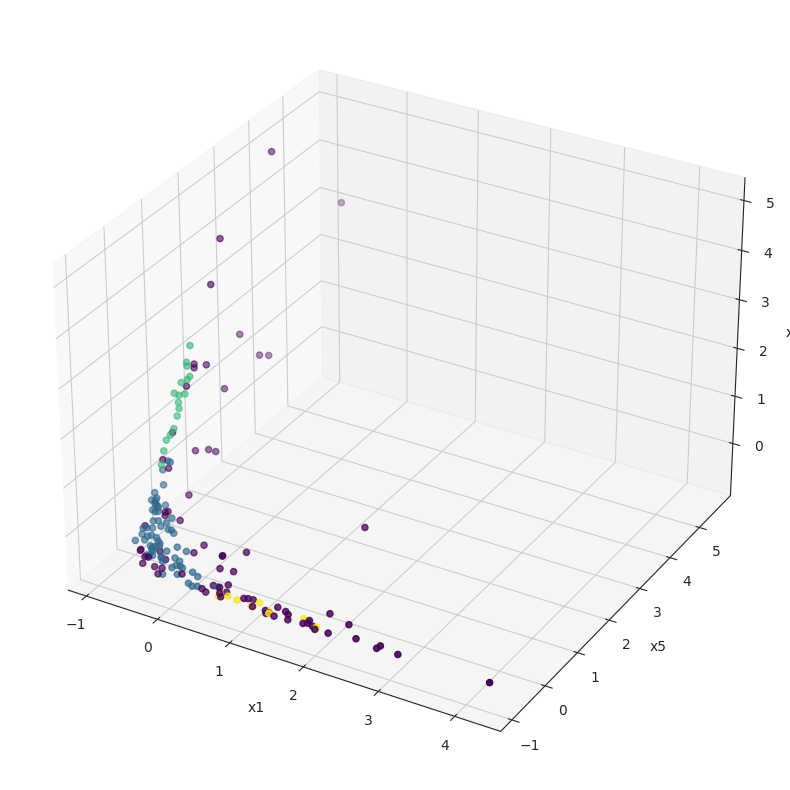

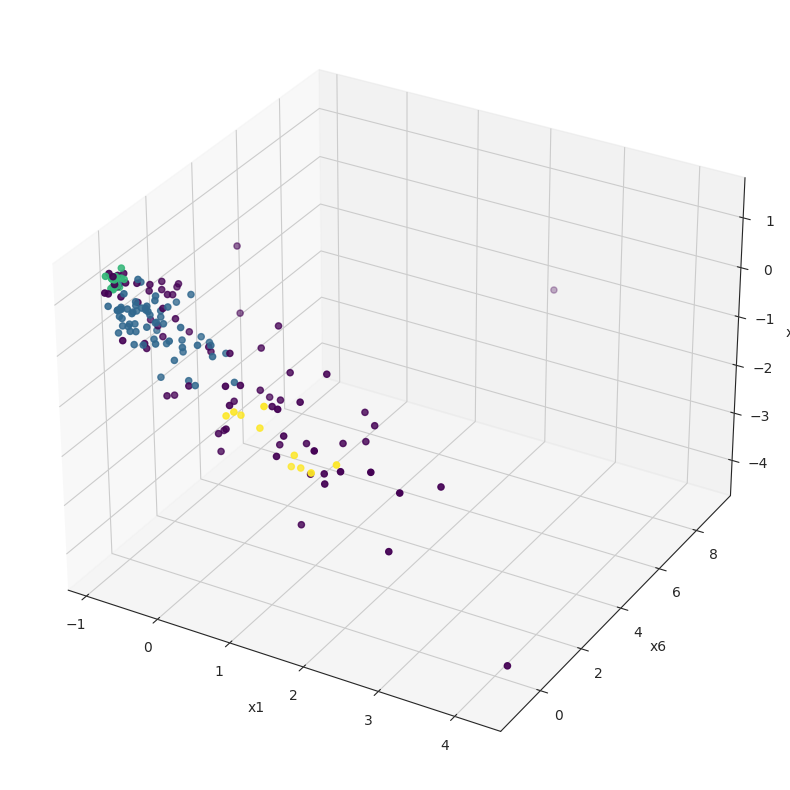

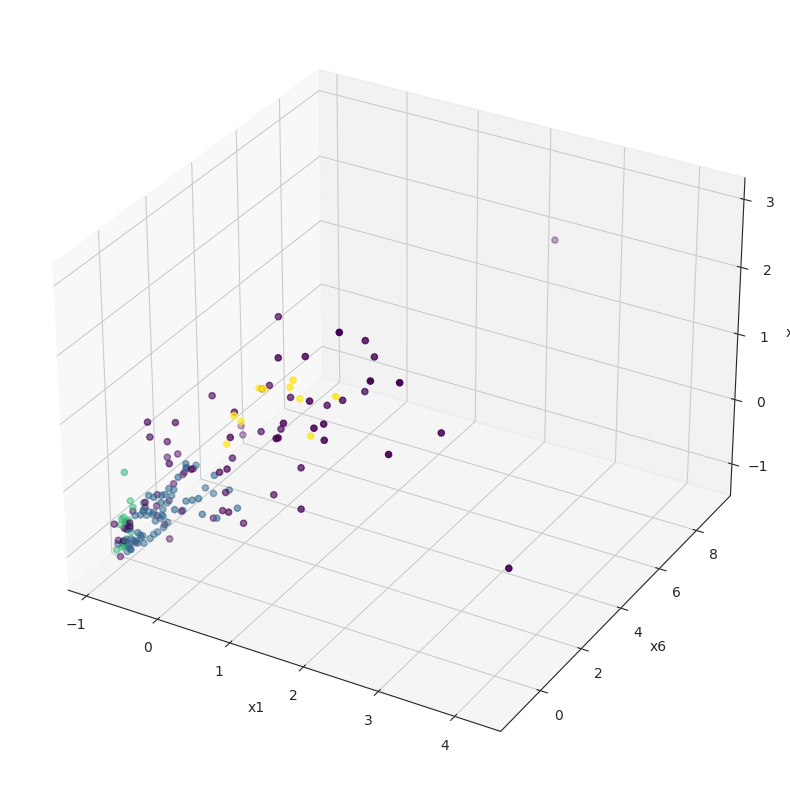

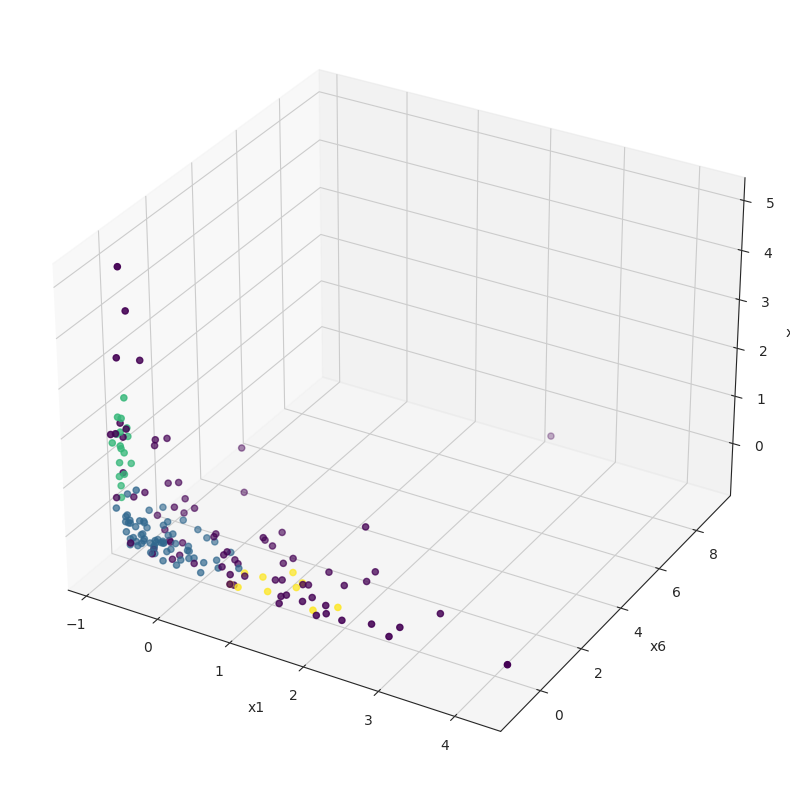

In [ ]:
def visualise_clusters_dbscan(model,x_train):
  count=0
  for i in range(len(x_train[0])):
    for j in range(i+1,len(x_train[0])):
      for k in range(j+1,len(x_train[0])):
        if (count>=25):
          return None
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ="3d")

        ax.scatter3D(x_train[:,i],x_train[:,j],x_train[:,k],c=model.labels_,cmap="viridis")

        ax.set_xlabel("x"+str(i+1))
        ax.set_ylabel("x"+str(j+1))
        ax.set_zlabel("x"+str(k+1))
        count=count+1
        plt.show()
visualise_clusters_dbscan(model_dbs,np.array(scaled_data))

In [ ]:
out_scaled_data_db['Class'].loc[out_scaled_data_db['Class'] == -1] = 'Noise / Outliers'
out_scaled_data_db['Class'].loc[out_scaled_data_db['Class'] == 0] = 'Might Need Help'
out_scaled_data_db['Class'].loc[out_scaled_data_db['Class'] == 2] = 'Help Needed'
out_scaled_data_db['Class'].loc[out_scaled_data_db['Class'] == 1] ='No Help Needed'

fig = px.choropleth(out_scaled_data_db[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = out_scaled_data_db['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')


**With PCA data**

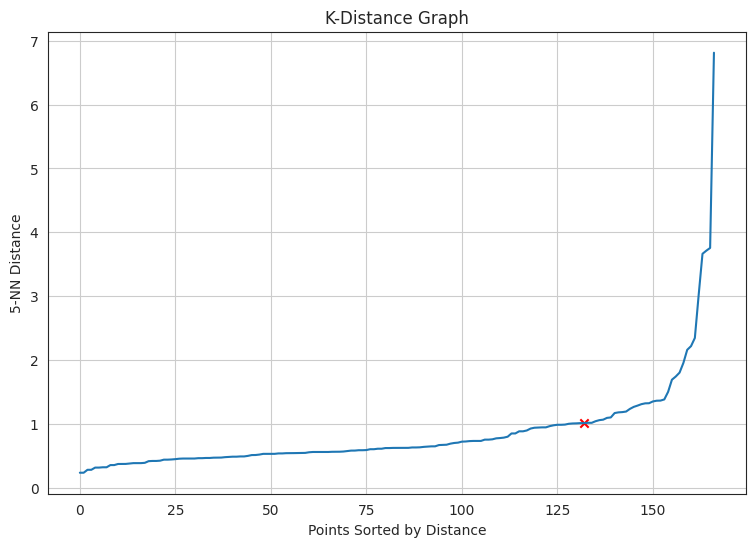

1.013331024214235


In [ ]:
fig=plt.subplots(nrows = 1, ncols = 1, figsize = (9,6))

#As we know we can choose min pts as<= 2*number of features
#k neighbours=minpts-1

minpts=6
model_knn=NearestNeighbors(n_neighbors = minpts-1)

model_knn.fit(pca_data)

distances,indices=model_knn.kneighbors(pca_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph');
eps=distances[132]
plt.scatter(132,eps,marker="x",c="red")
plt.show()
print(eps)

#choosing value of eps where we have abrupt increase in the distance

**Now Using DBscan on the Data Using Obtained Values of minpts and eps**

In [ ]:
model_dbs=DBSCAN(eps = eps , min_samples = minpts)
model_dbs.fit(pca_data)
labels=model_dbs.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

out_pca_data_db=original_data.copy(deep=True)

out_pca_data_db['Class'] = labels;

Number of Clusters :  3
Number of Outliers :  52


**Visualising Clusters**

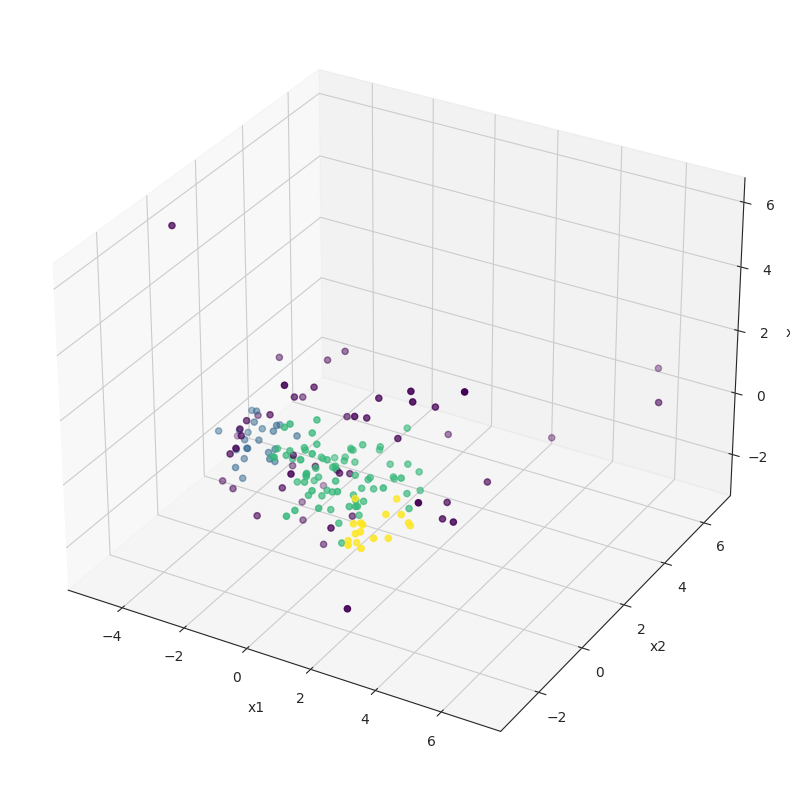

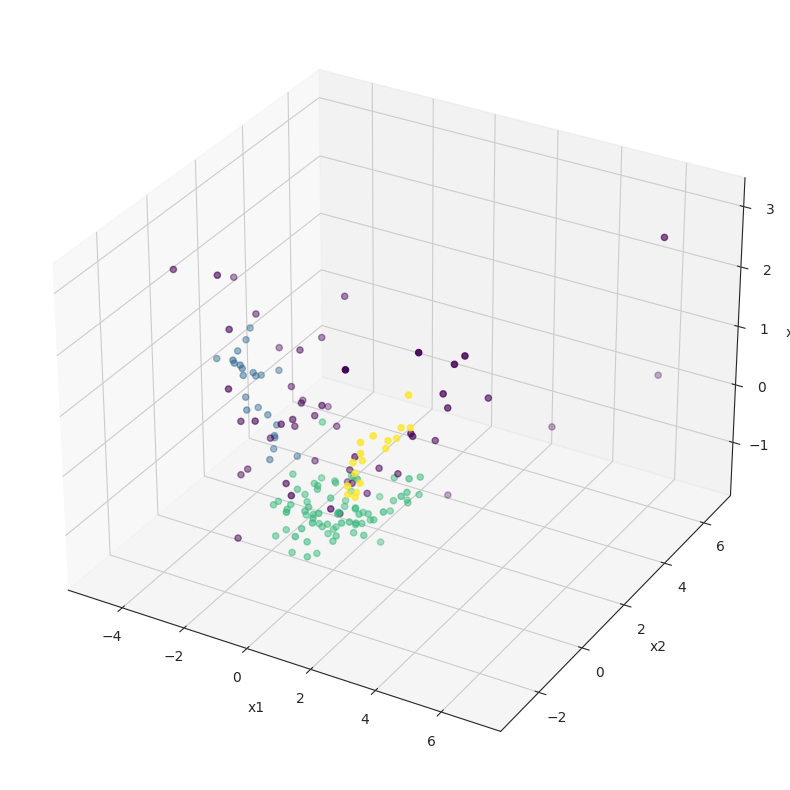

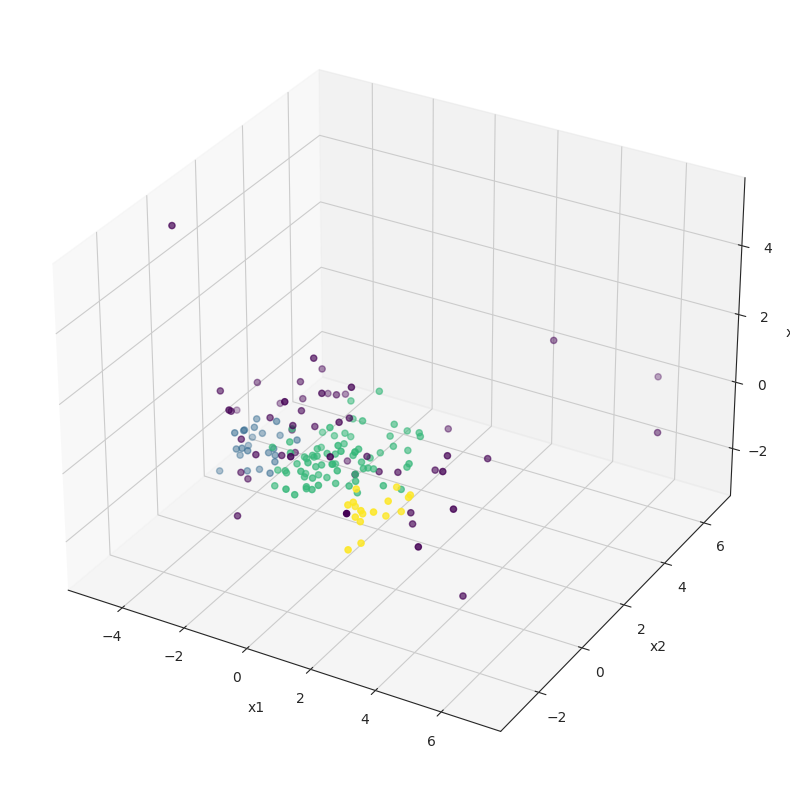

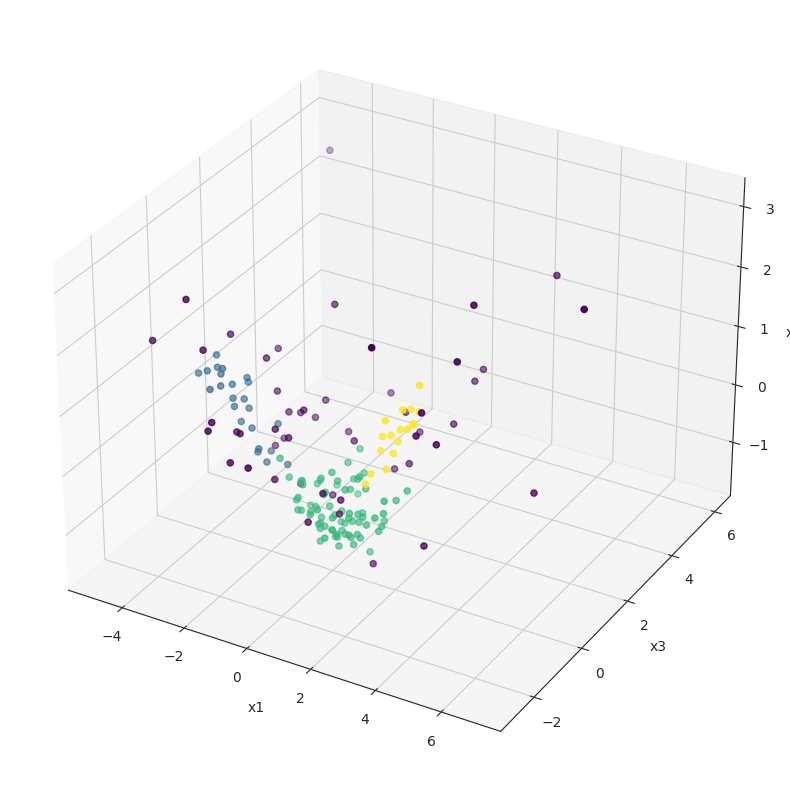

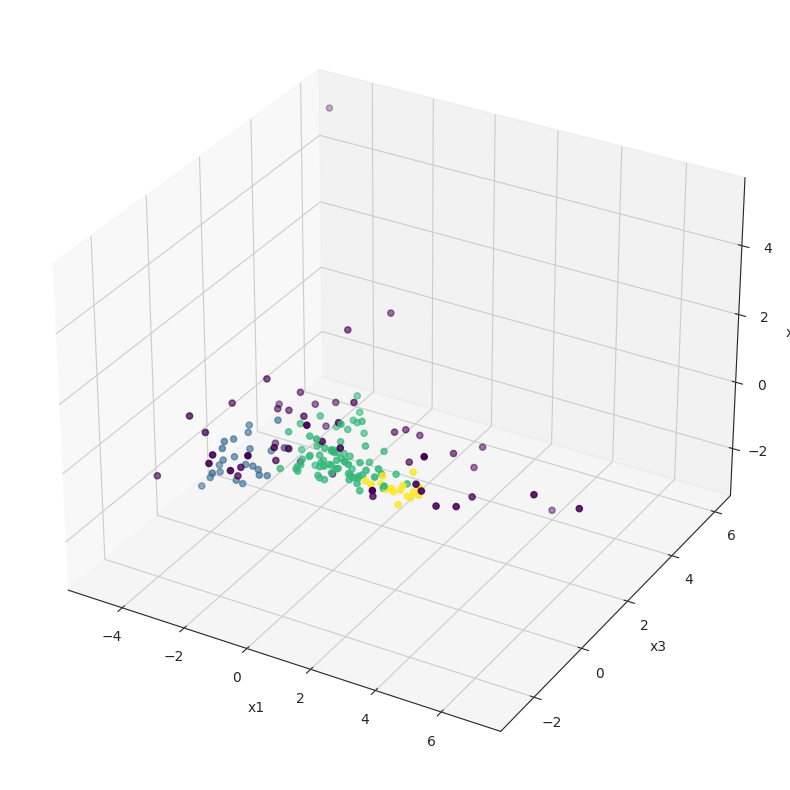

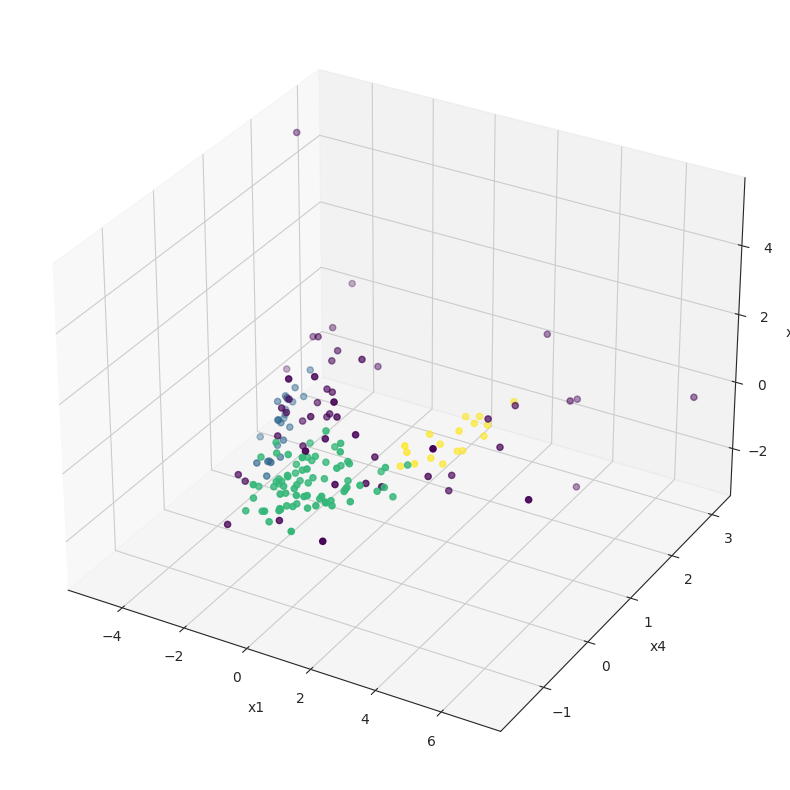

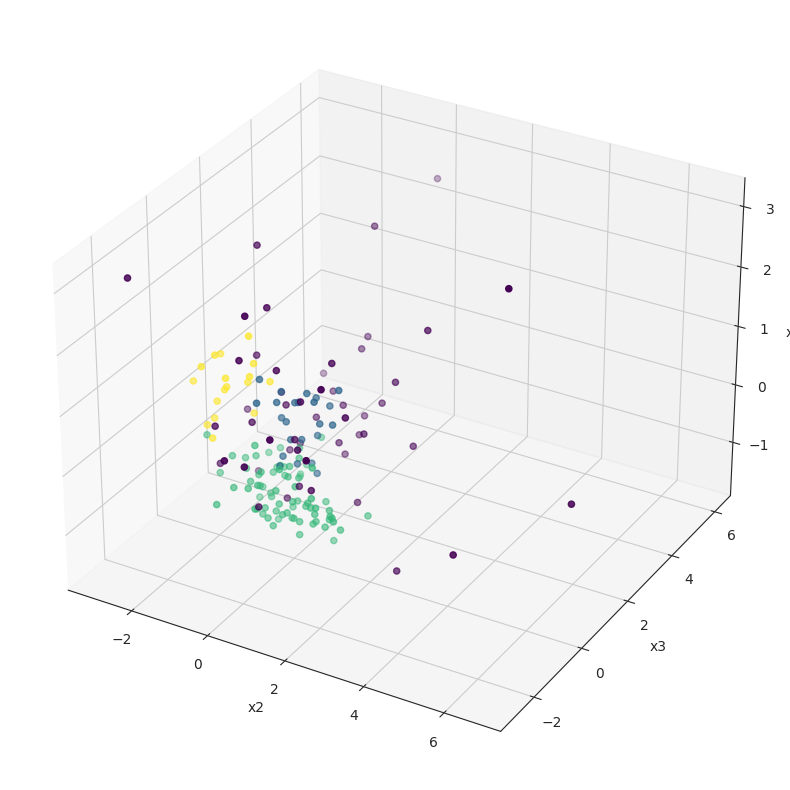

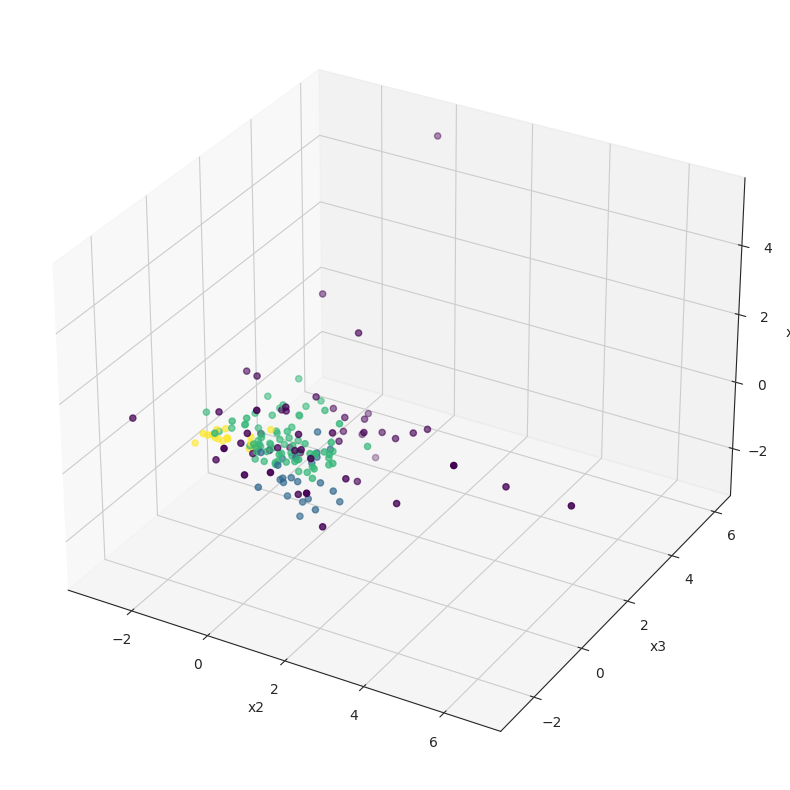

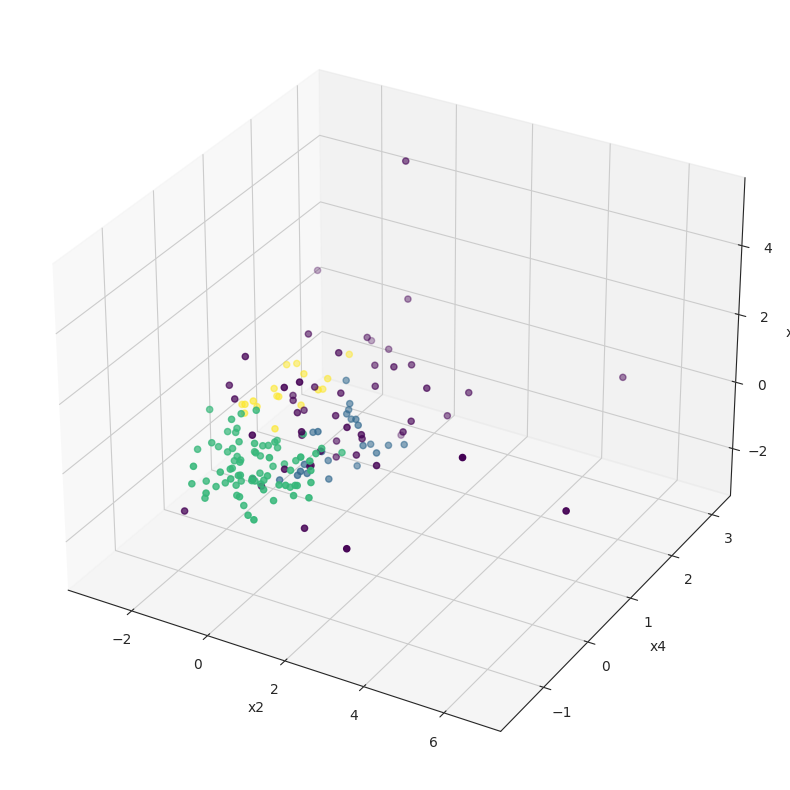

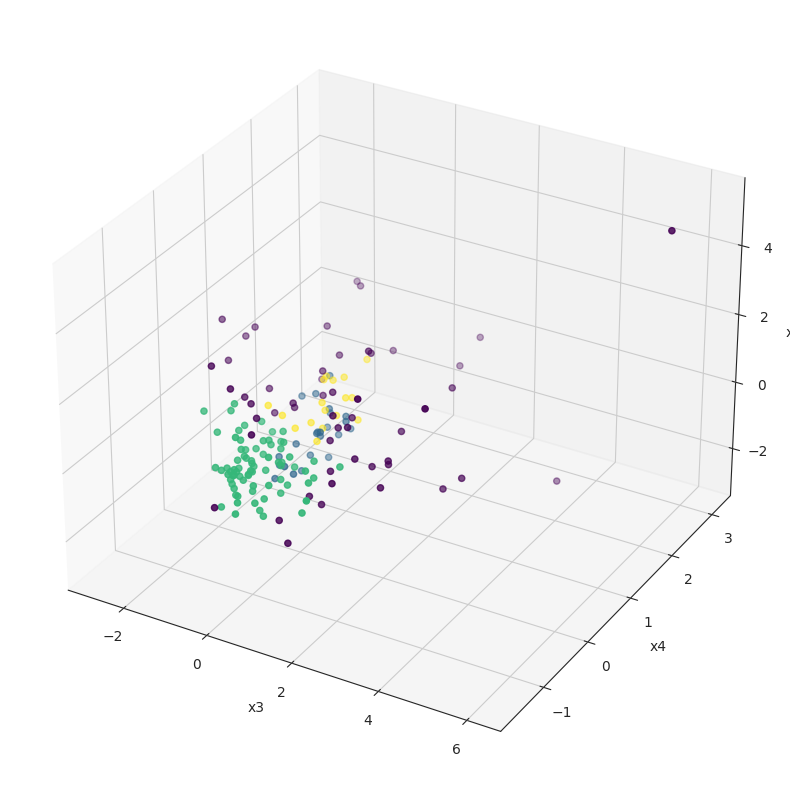

In [ ]:
visualise_clusters_dbscan(model_dbs,np.array(pca_data))

In [ ]:
out_pca_data_db['Class'].loc[out_pca_data_db['Class'] == -1] = 'Noise / Outliers'
out_pca_data_db['Class'].loc[out_pca_data_db['Class'] == 1] = 'Might Need Help'
out_pca_data_db['Class'].loc[out_pca_data_db['Class'] == 0] = 'Help Needed'
out_pca_data_db['Class'].loc[out_pca_data_db['Class'] == 2] ='No Help Needed'

fig = px.choropleth(out_pca_data_db[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = out_pca_data_db['Class'],
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')


**Implementing Hierarchical Clustering**

**On Original Scaled Data**

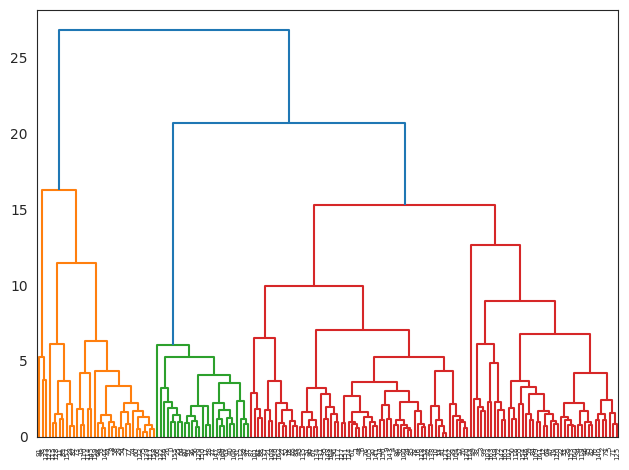

In [ ]:
linkage_data = linkage(scaled_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(scaled_data)

pred_agc = pd.Series(hierarchical_cluster.labels_)

out_scaled_data_he=original_data.copy(deep=True)
out_scaled_data_he['Class'] = pred_agc


In [ ]:
out_scaled_data_he['Class'].loc[out_scaled_data_he['Class'] == 0] = 'No Help Needed'
out_scaled_data_he['Class'].loc[out_scaled_data_he['Class'] == 2] = 'Help Needed'
out_scaled_data_he['Class'].loc[out_scaled_data_he['Class'] == 1] = 'Might Need Help'

fig = px.choropleth(out_scaled_data_he[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = out_scaled_data_he['Class'],
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')

**Using PCA data**

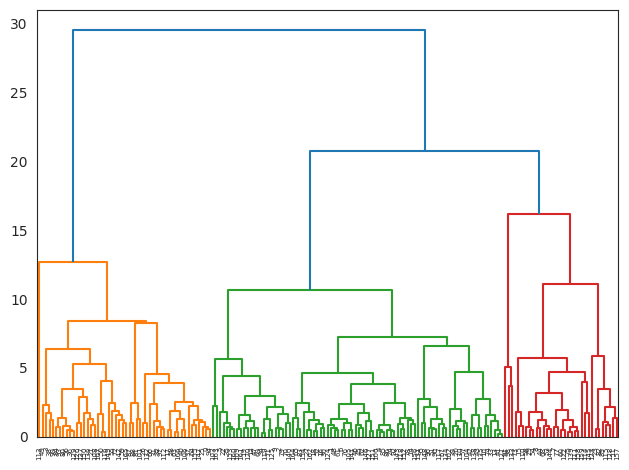

In [ ]:
linkage_data = linkage(pca_data, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(pca_data)

pred_agc = pd.Series(hierarchical_cluster.labels_)

out_pca_data_he=original_data.copy(deep=True)
out_pca_data_he['Class'] = pred_agc


In [ ]:
out_pca_data_he['Class'].loc[out_pca_data_he['Class'] == 0] = 'No Help Needed'
out_pca_data_he['Class'].loc[out_pca_data_he['Class'] == 1] = 'Help Needed'
out_pca_data_he['Class'].loc[out_pca_data_he['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(out_pca_data_he[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = out_pca_data_he['Class'],
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',paper_bgcolor=None,title_pad_l = 260,title_y = 0.86,margin=dict(l=0.5, r=60, t=50, b=0.5))
fig.show(engine = 'kaleido')